In [137]:
# This script is used to analyse the ramp PETCO2 data and ramp MRI data and plot filtered func signal as a function of ETCO2

In [138]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import matplotlib as mpl
from scipy import signal
from scipy.signal import find_peaks
from scipy.signal import resample
sys.path.append('..')
import ramp_cvr_functions as cvr_func
import copy
import csv
import nilearn as nl
from nilearn import image

save_files = False


O2_height = -20 # O2 valley 'height' for peak detection in %
plt.rcParams['font.family'] = 'Times New Roman'

ses ='ses-01'
task='ramp'

TR = 800 #TR in ms

In [ ]:
# mri_dir = '/Users/ghayes/Desktop/W3T_2023_121_001/'
# sub = 'mrsub-001'
# #func_file = mri_dir + 'pre_proc/filtered_func_data.nii.gz'
# func_file = mri_dir + 'pre_proc/pscbold_masked.nii.gz'
# zstat_file = mri_dir + 'pre_proc/thresh_zstat1.nii.gz'
# local = '/Users/ghayes/Desktop/W3T_2023_121_001/physio/001/'
# filename = 'TEBS_001.txt'
# O2prominence = 0.8
# comment_start = 1
# comment_end = 10

# mri_dir = '/Users/ghayes/Desktop/W3T_2023_121_002/'
# sub = 'mrsub-002'
# func_file = mri_dir + 'pre_proc_FM_bbr_stats01020.feat/filtered_func_data.nii.gz'
# zstat_file = mri_dir + 'pre_proc_FM_bbr_stats01020.feat/thresh_zstat1.nii.gz'
# local = '/Users/ghayes/Desktop/W3T_2023_121_002/physio/002/'
# filename = 'TEBS_002.txt'
# O2prominence = 0.8

# mri_dir = '/Users/ghayes/Desktop/W3T_2023_121_003/'
# sub = 'mrsub-003'
# func_file = mri_dir + 'pre_proc.feat/pscbold_masked.nii.gz'
# zstat_file = mri_dir + 'pre_proc.feat/thresh_zstat1.nii.gz'
# local = '/Users/ghayes/Desktop/W3T_2023_121_003/physio/003/'
# filename = 'TEBS_003.txt'
# O2prominence = 0.8

# mri_dir = '/Users/ghayes/Desktop/W3T_2023_121_004/'
# sub = 'mrsub-004'
# func_file = mri_dir + 'pre_proc_FM_bbr_stats-201020.feat/pscbold_masked.nii.gz'
# zstat_file = mri_dir + 'pre_proc_FM_bbr_stats-201020.feat/thresh_zstat1.nii.gz'
# local = '/Users/ghayes/Desktop/W3T_2023_121_003/Physio/003/'
# filename = 'TEBS_004.txt'
# O2prominence = 0.8


# # ### Oct 2024
# # MRI SUBJECT 003
# mri_dir = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/W3T_2023_121_003/'
# sub = 'mr-003'
# func_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/003.feat/pscbold_masked.nii.gz'
# # using a region instead: func_file = '/Users/ghayes/Desktop/ramp_protocol/mni_proc/003/pscbold_masked_8.nii.gz'
# zstat_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/003.feat/thresh_zstat1.nii.gz'
# local = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/Physio/003/'
# filename = 'TEBS_003.txt'
# output_dir = '/Users/ghayes/Desktop/ramp_protocol/proc/003/'
# P_oxford = 1000.6 # hPa (Oxford)
# O2prominence = 0.8 #prominence of O2 valley for peak detection, between 0.5 and 3 is a good range
# man_shift = -20 #in TRs of 800ms - adjusted manual shift in addition to xcorr shift

# ## MRI SUBJECT 004
# mri_dir = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/W3T_2023_121_004/'
# sub = 'mr-004'
# func_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/004.feat/pscbold_masked.nii.gz'
# zstat_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/004.feat/thresh_zstat1.nii.gz'
# local = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/Physio/004/'
# filename = 'TEBS_004.txt'
# output_dir = '/Users/ghayes/Desktop/ramp_protocol/proc/004/'
# P_oxford = 1024.2 # hPa (Oxford)
# O2prominence = 0.8 #prominence of O2 valley for peak detection, between 0.5 and 3 is a good range
# man_shift = -24 #in TRs of 800ms - adjusted manual shift in addition to xcorr shift

# # MRI SUBJECT 005
# mri_dir = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/W3T_2023_121_005/'
# sub = 'mr-005'
# func_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/005.feat/pscbold_masked.nii.gz'
# zstat_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/005.feat/thresh_zstat1.nii.gz'
# local = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/Physio/005/'
# filename = 'TEBS_005.txt'
# output_dir = '/Users/ghayes/Desktop/ramp_protocol/proc/005/'
# P_oxford = 1004.1 # hPa (Oxford)
# O2prominence = 0.8 #prominence of O2 valley for peak detection, between 0.5 and 3 is a good range
# man_shift = -20 #in TRs of 800ms - adjusted manual shift in addition to xcorr shift

# # MRI SUBJECT 006 (TCD SUB-025)
# mri_dir = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/W3T_2023_121_006/'
# sub = 'mr-006'
# func_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/006.feat/pscbold_masked.nii.gz'
# zstat_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/006.feat/thresh_zstat1.nii.gz'
# local = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/Physio/006/'
# filename = 'TEBS_006.txt'
# output_dir = '/Users/ghayes/Desktop/ramp_protocol/proc/006/'
# P_oxford = 1008.1 # hPa (Oxford)
# O2prominence = 0.8 #prominence of O2 valley for peak detection, between 0.5 and 3 is a good range
# man_shift = -20 #in TRs of 800ms - adjusted manual shift in addition to xcorr shift

# # MRI SUBJECT 007 (TCD SUB-024)
# mri_dir = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/W3T_2023_121_007/'
# sub = 'mr-007'
# func_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/007.feat/pscbold_masked.nii.gz'
# zstat_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/007.feat/thresh_zstat1.nii.gz'
# local = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/Physio/007/'
# filename = 'TEBS_007.txt'
# output_dir = '/Users/ghayes/Desktop/ramp_protocol/proc/007/'
# P_oxford = 1011.5 # hPa (Oxford)
# O2prominence = 0.8 #prominence of O2 valley for peak detection, between 0.5 and 3 is a good range
# man_shift = -20 #in TRs of 800ms - adjusted manual shift in addition to xcorr shift

# # MRI SUBJECT 008 (TCD SUB-026)
# mri_dir = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/W3T_2023_121_008/'
# sub = 'mr-008'
# func_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/008.feat/pscbold_masked.nii.gz'
# zstat_file = '/Users/ghayes/Desktop/ramp_protocol/preproc/008.feat/thresh_zstat1.nii.gz'
# local = '/Users/ghayes/Desktop/ramp_protocol/data/MRI/Physio/008/'
# filename = 'TEBS_008.txt'
# output_dir = '/Users/ghayes/Desktop/ramp_protocol/proc/008/'
# P_oxford = 1015.1 # hPa (Oxford)
# O2prominence = 0.8 #prominence of O2 valley for peak detection, between 0.5 and 3 is a good range
# man_shift = -20 #in TRs of 800ms - adjusted manual shift in addition to xcorr shift


In [140]:
# Using nilearn to load the ffunc NIfTI file
# Load the ffunc NIfTI file

func_img = image.load_img(func_file)
func_data = func_img.get_fdata()
print('func_data shape:', func_data.shape)

func_data shape: (90, 90, 60, 769)


In [141]:
# define output directory for preprocessed data
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# define a folder with output_dir for figures
output_dir_fig = output_dir + 'figures/'
if not os.path.exists(output_dir_fig):
    os.makedirs(output_dir_fig)

In [142]:
outdir_logs = '/Users/ghayes/Desktop/ramp_protocol/proc/'

In [143]:
# # # Load the mean_func.nii.gz file and extract the mean func values to normalize the func data
# # mean_func_file = mri_dir + 'pre_proc/mean_func.nii.gz'
# # mean_func_img = image.load_img(mean_func_file)
# # mean_func_data = mean_func_img.get_fdata()

# # # number of 0 values in mean_func_data
# # print('number of 0 values in mean_func_data:', np.sum(mean_func_data==0))


In [144]:
# # Calculate the mean value of each voxel in the func data
# mean_func_data = np.mean(func_data, axis=3)
# print('mean_func_data shape:', mean_func_data.shape)
# print('number of 0 values in mean_func_data:', np.sum(mean_func_data==0))
# print('max value in mean_func_data:', np.max(mean_func_data))

# # mean of the non zero values in mean_func_data
# mean_mean_func_data = np.mean(mean_func_data)
# print('mean of mean_func_data:', mean_mean_func_data)


# #func_data_psc = np.zeros(func_data.shape)

# # # subtract the mean_mean_func_data from the func_data_thresh
# # for i in range(func_data.shape[3]):
# #     func_data_psc[:,:,:,i] = ((func_data[:,:,:,i] - mean_mean_func_data) / mean_mean_func_data )* 100

# # print('func_data_psc shape:', func_data_psc.shape)
# # print('')
    


In [145]:
#func_data = copy.deepcopy(func_data_psc)

In [146]:
# # Using nilearn, binarize and apply a zstat threshold to the ffunc NIfTI file
# # Load the zstat NIfTI file

# zstat_img = image.load_img(zstat_file)
# zstat_data = zstat_img.get_fdata()
# print('zstat_data shape:', zstat_data.shape)

# # Binarize the zstat image
# zstat_data_bin = copy.deepcopy(zstat_data)
# zstat_data_bin[zstat_data_bin != 0] = 1
# print('number of non-zero values in zstat_data_bin:', np.sum(zstat_data_bin))

# func_data_psc = np.zeros(func_data.shape,dtype=float)

# # Apply the zstat threshold to the ffunc image
# for i in range(0, func_data.shape[3]):
#     #func_data_thresh[:,:,:,i] = func_data[:,:,:,i]*zstat_data_bin
#     a = (func_data[:,:,:,i] - mean_mean_func_data)
#     func_data_psc[:,:,:,i] = (np.divide(a, mean_func_data, out=np.zeros_like(a), where=mean_func_data!=0))*100

# print('func_data_psc shape:', func_data_psc.shape)

In [147]:
# # Create a new array to store the thresholded ffunc data
# func_data_thresh = np.zeros(func_data.shape,dtype=float)

# # Apply the zstat threshold to the ffunc image
# for i in range(0, func_data_psc.shape[3]):
#     func_data_thresh[:,:,:,i] = func_data[:,:,:,i]*zstat_data_bin

# print('func_data_thresh shape:', func_data_thresh.shape)

In [148]:
# print('mean of func_data before:', np.mean(func_data))
# print('type of func_data:', type(func_data))
# print('shape of func_data:', func_data.shape)

# print('mean of func_data_psc:', np.mean(func_data_psc))
# print('type of func_data_psc:', type(func_data_psc))
# print('shape of func_data_psc:', func_data_psc.shape)

In [149]:
# # calculate the percent signal change
# for i in range(0, func_data_thresh.shape[3]):
#     func_data_psc[:,:,:,i] = (func_data_thresh[:,:,:,i] - mean_mean_func_data_nonzero)/mean_mean_func_data_nonzero*100


# # set all nan values in func_data_psc to 0
# func_data_psc[np.isnan(func_data_psc)] = 0

# print('func_data mean:', np.mean(func_data))
# print('func_data_psc mean:', np.mean(func_data_psc))

In [150]:
# # Average func_data_thresh over all the voxels, leaving a single average time series
# # ignore values that are zero
# print('number of zero values in func_data_thresh:', np.sum(func_data_thresh==0))
# print('number of non-zero values in func_data_thresh:', np.sum(func_data_thresh!=0))
# # compute the mean of each TR across all NON-ZERO voxels
# func_data_thresh_avg = np.zeros(func_data_thresh.shape[3])
# for i in range(0, func_data_thresh.shape[3]):
#     func_data_thresh_avg = np.mean(func_data_thresh[func_data_thresh!=0], axis=(0,1,2))


# print('func_data_thresh_avg shape:', func_data_thresh_avg.shape)

In [151]:
# get the mean of the non-zero values in func_data_thresh_avg for each TR (4th dimension)
# replace the zero values with nans
func_data_nan = copy.deepcopy(func_data)
func_data_nan[func_data_nan==0] = np.nan
# print the number of nans in func_data_nan
print('number of nans in func_data_nan:', np.sum(np.isnan(func_data_nan)))
print('number of non-nans in func_data_nan:', np.sum(~np.isnan(func_data_nan)))
print('shape of func_data_nan:', func_data_nan.shape)
func_data_avg = np.nanmean(func_data_nan, axis=(0,1,2))


number of nans in func_data_nan: 290632929
number of non-nans in func_data_nan: 83101071
shape of func_data_nan: (90, 90, 60, 769)


In [152]:
# Add a time column to the func_data_thresh_avg array where each data point is at TR intervals of 0.8s
TR = 800 # TR in ms
time = np.arange(0, func_data_avg.shape[0]*TR, TR)
# set the index of func_data_thresh_avg to be the time array
func_data_avg = pd.DataFrame(func_data_avg, index=time)
print('func_data_avg shape:', func_data_avg.shape)
print('func_data_avg head:', func_data_avg.head())
print('func_data_avg :', func_data_avg)

func_data_avg shape: (769, 1)
func_data_avg head:              0
0     3.729013
800   3.015332
1600  2.538033
2400  2.505544
3200  2.393488
func_data_avg :                0
0       3.729013
800     3.015332
1600    2.538033
2400    2.505544
3200    2.393488
...          ...
611200 -2.577405
612000 -2.714166
612800 -2.713578
613600 -2.793052
614400 -2.882827

[769 rows x 1 columns]


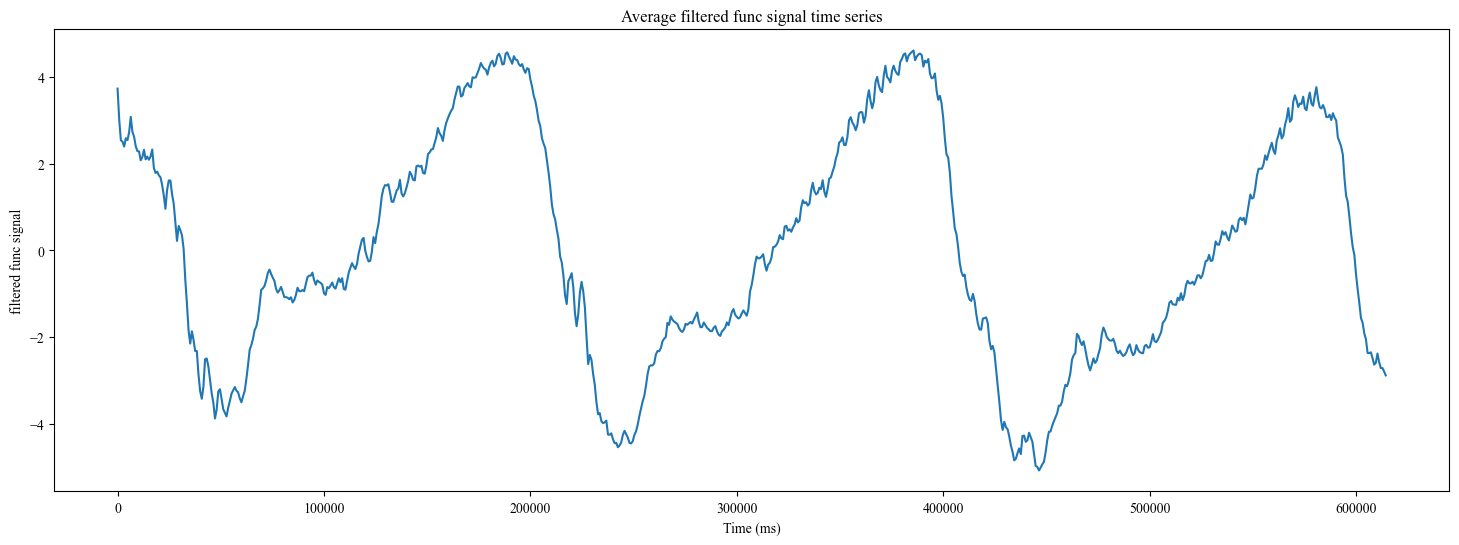

In [153]:
# Plot the average time series
#plot
fig_ffunc_raw = plt.figure()
#plot parameters
fig_ffunc_raw.set_figheight(6)
fig_ffunc_raw.set_figwidth(18)
tfont = {'fontname':'Times'}
plt.plot(func_data_avg)
plt.xlabel('Time (ms)')
plt.ylabel('filtered func signal')
plt.title('Average filtered func signal time series')
plt.show()

In [154]:
func_data_thresh_avg = copy.deepcopy(func_data_avg)

In [155]:
# if save_files is True, save the figure
if save_files:
    fig_ffunc_raw.savefig(output_dir_fig + sub +'_fig_ffunc_raw.png')

In [156]:
# # Load the mean_func.nii.gz file and extract the mean func value to normalize the func data
# mean_func_file = mri_dir + 'pre_proc/mean_func.nii.gz'
# mean_func_img = image.load_img(mean_func_file)
# mean_func_data = mean_func_img.get_fdata()
# print('mean_func_data mean value:', np.mean(mean_func_data))

# # Convert ffunc data to percent signal change
# func_data_thresh_avg_psc = (func_data_thresh_avg - np.mean(mean_func_data))/np.mean(mean_func_data)*100

In [157]:
# # Plot the average time series now in percent signal change
# #plot
# fig_ffunc_raw = plt.figure()
# #plot parameters
# fig_ffunc_raw.set_figheight(6)
# fig_ffunc_raw.set_figwidth(18)
# tfont = {'fontname':'Times'}
# plt.plot(func_data_thresh_avg_psc)
# plt.xlabel('Time (ms)')
# plt.ylabel('filtered func signal')
# plt.title('Average filtered func signal time series')
# plt.show()

# LOAD PHYSIO DATA

In [158]:
filepath = local + filename
print(filepath)

/Users/ghayes/Desktop/ramp_protocol/data/MRI/Physio/003/TEBS_003.txt


In [159]:
# Read text file into pandas DataFrame
cols = pd.read_csv(filepath, sep='\t', nrows=4, header=(4)).columns
# Delete the first column
cols = cols.drop(cols[0])
cols = cols.insert(0, 'Time')


# # Add a column to the DataFrame
# cols = cols.insert(3, 'Comments')
# Read the file into a DataFrame
df_raw = pd.read_csv(filepath, sep='\t',skiprows=(0,1,2,3,4,5,6,7,8,9),header=None, names=cols)
# name the columns
df_raw.columns = ['Time','CO2','O2','Trig']


df_raw['Time'] = pd.to_numeric(df_raw['Time'],errors = 'coerce')
df_raw['CO2'] = pd.to_numeric(df_raw['CO2'],errors = 'coerce')
df_raw['O2'] = pd.to_numeric(df_raw['O2'],errors = 'coerce')
df_raw['Trig'] = pd.to_numeric(df_raw['Trig'],errors = 'coerce')
print(df_raw)
print(df_raw.Trig.dtype)

# print the number of trigger values above 3
print('---------------------------------')
print('Number of triggers in dataset:', len(df_raw[df_raw['Trig']>3]))
print('---------------------------------')

# # List the rows with comments
# rows_comments=df_raw[df_raw['Comments'].notnull()]
# print('--- COMMENTS ---')
# print(rows_comments)

           Time       CO2        O2      Trig
0          0.01  5.565638  16.96433  0.000000
1          0.02  5.583873  16.95794 -0.000313
2          0.03  5.604861  16.97391 -0.000313
3          0.04  5.620344  16.97072  0.000000
4          0.05  5.633074  16.98030 -0.000313
...         ...       ...       ...       ...
114664  1146.65  0.330732  21.36758 -0.000313
114665  1146.66  0.335549  21.37716 -0.000313
114666  1146.67  0.336238  21.38355 -0.000625
114667  1146.68  0.333829  21.38994  0.000000
114668  1146.69  0.329356  21.38675 -0.000313

[114669 rows x 4 columns]
float64
---------------------------------
Number of triggers in dataset: 769
---------------------------------


In [160]:
# # Print the index of comment_start
# print('--- COMMENT START ---')
# print('Index of comment_start:', rows_comments.index[comment_start])

# # Print the index of comment_end
# print('--- COMMENT END ---')
# print('Index of comment_end:', rows_comments.index[comment_end])

In [161]:
# # MANUALLY REMOVE SECTIONS 
# # insert comment for remove_start and remove_stop
# remove_start_manual_1 = 173000
# remove_stop_manual_1 = 190000

# # add comments to remove indices list
# remove_indices.append(remove_start_manual_1)
# remove_indices.append(remove_stop_manual_1)
# # re-order list (accending order)
# remove_indices.sort()

# print('--- REMOVE INDICES ---')
# print(remove_indices)


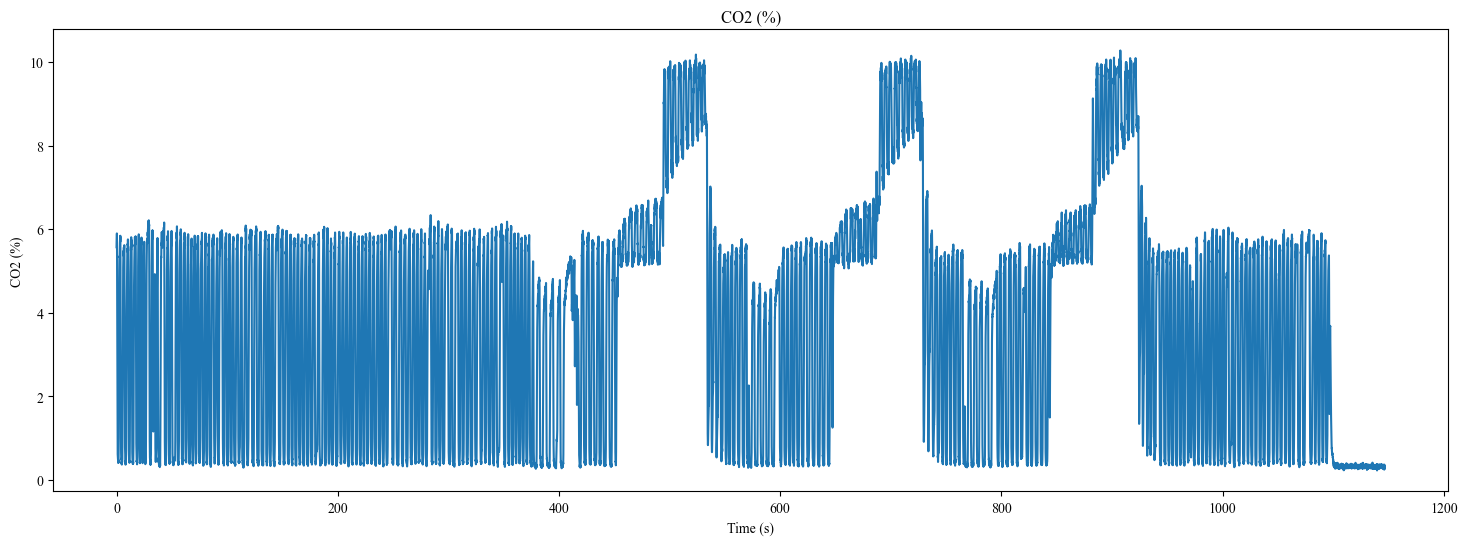

In [162]:
# plot the data before any removal or filtering

#plot
fig_co2_raw = plt.figure()

#plot parameters
fig_co2_raw.set_figheight(6)
fig_co2_raw.set_figwidth(18)
tfont = {'fontname':'Times'}

plt.plot(df_raw['Time'],df_raw['CO2'])
plt.xlabel('Time (s)')
plt.ylabel('CO2 (%)')
plt.title('CO2 (%)')
plt.show()


In [163]:
# if save_files is True, save the figure
if save_files:
    fig_co2_raw.savefig(output_dir_fig + sub +'_fig_co2_raw.png')

number of triggers: 769
indices of triggers: Index([35119, 35199, 35279, 35359, 35439, 35519, 35599, 35679, 35758, 35838,
       ...
       95838, 95918, 95998, 96078, 96158, 96238, 96318, 96398, 96478, 96558],
      dtype='int64', length=769)
number of triggers found: 769
extracting the last 769 triggers
index of the first trigger: 35119
index of the last trigger: 96558
index to start crop: 35118
index to end crop: 96559
shape of df_raw (before cropping): (114669, 4)
shape of df_all (after cropping): (61441, 4)


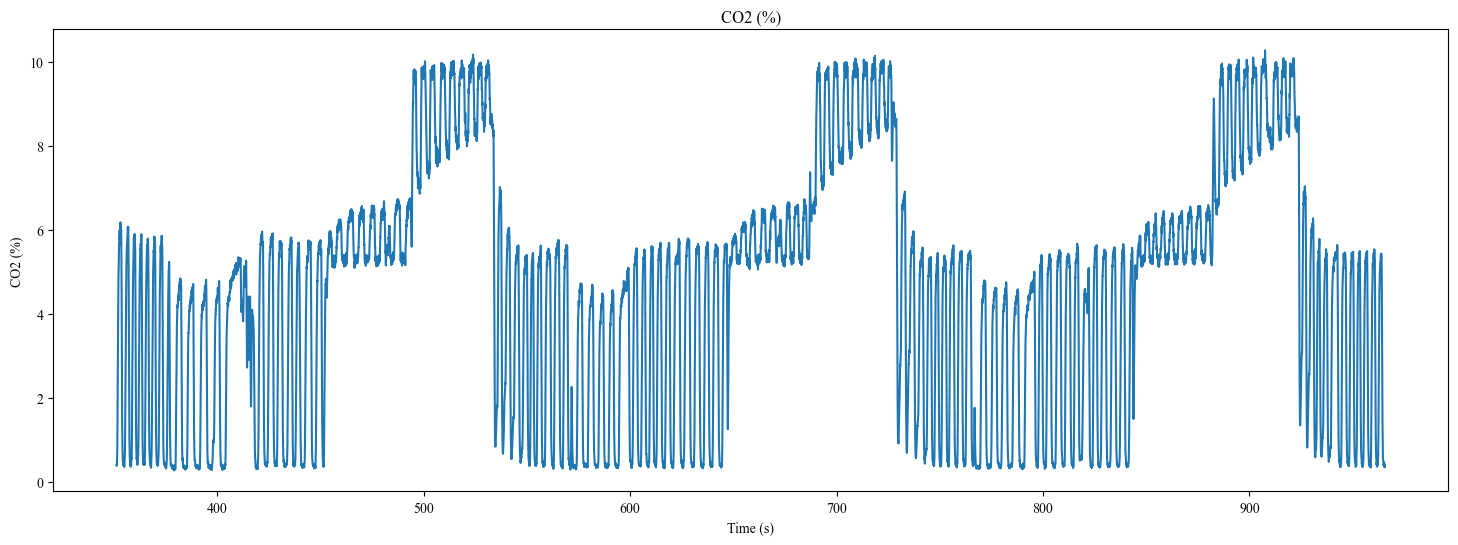

--- DATAFRAME INFO ---
Start of data window: 351.19 s
End of data window: 965.59 s
Length of data window: 614.4000000000001 s


/var/folders/ck/546jljvj7g3cptvhpxg8p2qh0000gn/T/ipykernel_91657/2964878861.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Start of data window:', df_all.iloc[0][0], 's')
/var/folders/ck/546jljvj7g3cptvhpxg8p2qh0000gn/T/ipykernel_91657/2964878861.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('End of data window:', df_all.iloc[-1][0], 's')
/var/folders/ck/546jljvj7g3cptvhpxg8p2qh0000gn/T/ipykernel_91657/2964878861.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beha

In [164]:
## CROP USING COMMENTS
#df_all = cvr_func.get_data_between_comments(df_raw, comment1_index=comment_start, comment2_index=comment_end, crop_start=1, crop_end=1)

## MANUAL CROP
# # manually crop the first 420seconds and last 100 seconds of the data
# df_all = df_raw[65000:-20000]

## CROP USING TRIGGERS
# only keep data from the first trigger to 1 after the last trigger
trig_col_name = 'Trig'
print('number of triggers:', len(df_raw[df_raw['Trig']>3]))
print('indices of triggers:', df_raw[df_raw[trig_col_name]>3].index)

df_all = cvr_func.get_data_between_triggers(df_raw, trig_col_name='Trig', trigger_thresh=3, num_ind_before_trig=1, num_ind_afer_trig=1)
print('shape of df_raw (before cropping):', df_raw.shape)
print('shape of df_all (after cropping):', df_all.shape)


# plot the data after removal of sections
#plot
fig_cropped = plt.figure()

#plot parameters
fig_cropped.set_figheight(6)
fig_cropped.set_figwidth(18)
tfont = {'fontname':'Times'}

plt.plot(df_all['Time'],df_all['CO2'])
plt.xlabel('Time (s)')
plt.ylabel('CO2 (%)')
plt.title('CO2 (%)')
plt.show()


print('--- DATAFRAME INFO ---')
# Print the firt element of time
print('Start of data window:', df_all.iloc[0][0], 's')
# Print the last element of time
print('End of data window:', df_all.iloc[-1][0], 's')
print('Length of data window:', float(df_all.iloc[-1][0]) - float(df_all.iloc[0][0]), 's')

In [165]:
# re index the data 
df_all = df_all.reset_index(drop=True)

In [166]:
### SEPERATE DATA ###

#get raw CO2 and O2 data
CO2 = pd.to_numeric(df_all.iloc[:,1], errors='coerce')
O2 = pd.to_numeric(df_all.iloc[:,2], errors='coerce')
#get raw Trigger data
Trig = pd.to_numeric(df_all.iloc[:,3], errors='coerce')

print(CO2)

0        0.378901
1        0.390943
2        0.399201
3        0.404018
4        0.407458
           ...   
61436    0.340710
61437    0.345527
61438    0.353785
61439    0.366171
61440    0.380622
Name: CO2, Length: 61441, dtype: float64


In [167]:
sample_rate = 1/(float(df_all.iloc[2][0]) - float(df_all.iloc[1][0]))

print('Sample rate:', sample_rate, 'Hz')

# #### SHIFT CO2 AND O2 DATA RELATIVEL TO THE TCD DATA ####
# gas_shift_time = 0.01 # seconds

# # Shift CO2 and O2 data to account for 2 second delay in nasal cannula to gas analyser measurement (note 200 Hz sampling rate)
# print ('--- SHIFTING CO2 AND O2 DATA ---')
# sample_rate = 1/(float(df_all.iloc[2][0]) - float(df_all.iloc[1][0]))
# gas_shift = int(gas_shift_time*sample_rate)
# print('gas_shift:',gas_shift, 'indices')

# CO2 = CO2.shift(periods=gas_shift, fill_value=np.nan)
# O2 = O2.shift(periods=gas_shift, fill_value=np.nan)


Sample rate: 100.00000000009095 Hz


/var/folders/ck/546jljvj7g3cptvhpxg8p2qh0000gn/T/ipykernel_91657/4184875328.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_rate = 1/(float(df_all.iloc[2][0]) - float(df_all.iloc[1][0]))


In [168]:
#### MASK CO2 DATA #### 

# Remove CO2 values above 100% CO2 (stopping and starting of the DAQ can cause erroneous values which are very large, this removes them)
CO2 = CO2.mask(CO2 > 100)
# calculate the index of the CO2 values above 100cm/s
CO2_above_100 = CO2[CO2 > 100]
# remove this index from the O2 and TCD data as well
O2 = O2.drop(CO2_above_100.index)

## Remove CO2 values below 2.5%
#CO2 = CO2.mask(CO2 < 2.9)

# print CO2 values
print('--- CO2 VALUES ---')
print(CO2)
print(CO2.shape)
# print the number of NaN values in the data
print('Number of NaN values in CO2:', CO2.isnull().sum())

--- CO2 VALUES ---
0        0.378901
1        0.390943
2        0.399201
3        0.404018
4        0.407458
           ...   
61436    0.340710
61437    0.345527
61438    0.353785
61439    0.366171
61440    0.380622
Name: CO2, Length: 61441, dtype: float64
(61441,)
Number of NaN values in CO2: 0


In [169]:
# # scale the time axis of the CO2 and O2 data to ms based on the sample rate
# time = np.arange(0, len(CO2)/sample_rate, 1/sample_rate)
# time = time*1000

# # add a time column to the CO2 and O2 data
# CO2 = pd.DataFrame(CO2, index=time)
# O2 = pd.DataFrame(O2, index=time)

# print(CO2)



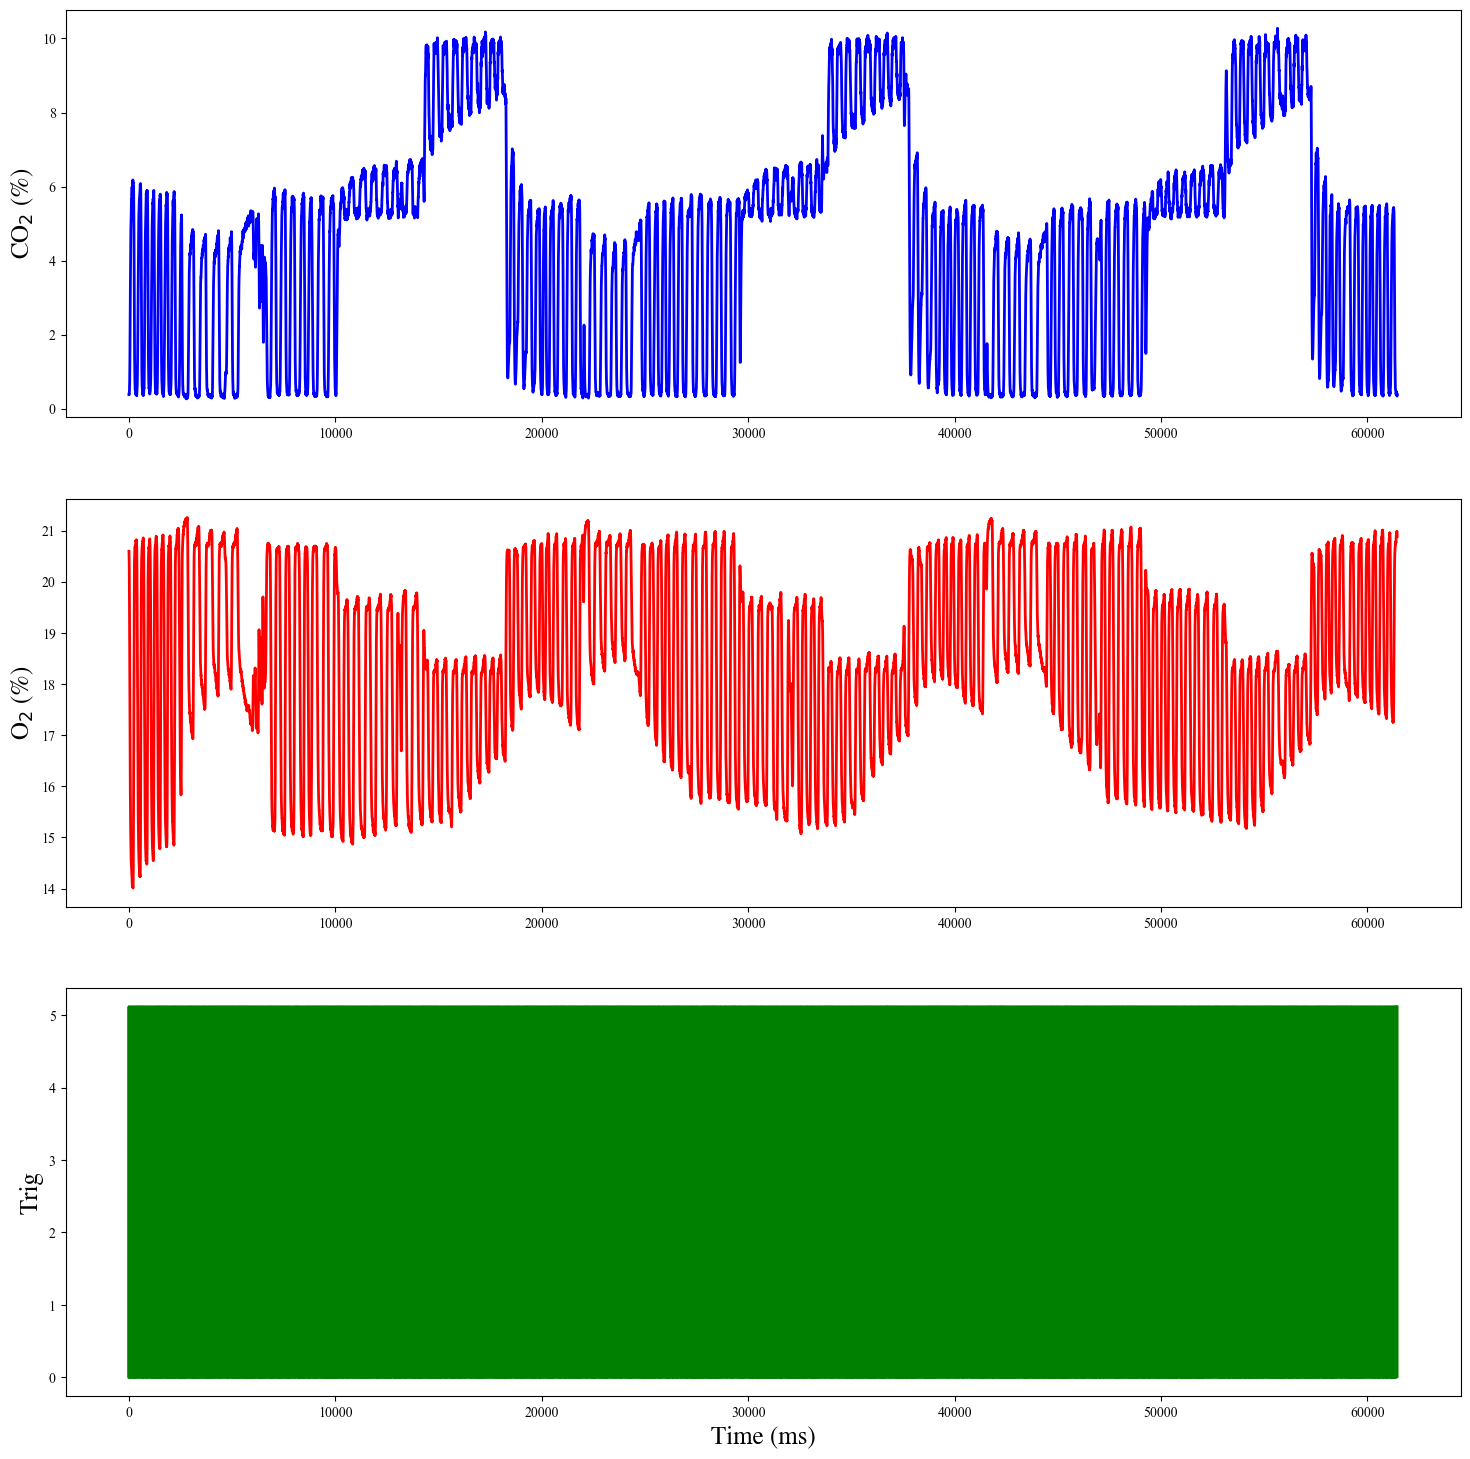

In [170]:
#plot
fig_physio_raw = plt.figure()

#plot parameters
fig_physio_raw.set_figheight(18)
fig_physio_raw.set_figwidth(18)
tfont = {'fontname':'Times'}

#plot CO2 percentage
ax1 = fig_physio_raw.add_subplot(311)   
ax1.set_ylabel('CO$_{2}$ (%)', fontsize=18, **tfont)
CO2.plot(c="blue", lw=2)

#plot O2 percentage
ax2 = fig_physio_raw.add_subplot(312)     
ax2.set_ylabel('O$_{2}$ (%)', fontsize=18, **tfont)
O2.plot(c="red", lw=2)

#plot Trig data
ax3 = fig_physio_raw.add_subplot(313)
ax3.set_ylabel('Trig', fontsize=18, **tfont)
Trig.plot(c="green", lw=2)
#ax3.legend(['Trig'], loc='upper right')

plt.xlabel('Time (ms)', fontsize=18, **tfont)
plt.show()



# #remove the x-axis ticks and numbers
# ax1.set_xticklabels([])
# ax2.set_xticklabels([])
# ax3.set_xticklabels([])
# ax4.set_xticklabels([])


In [171]:
# if save_files is True, save the figure
if save_files:
    fig_physio_raw.savefig(output_dir_fig + sub + '_fig_raw_data.png')

In [172]:
# Define search window as 0.5 seconds longer than the average breathing rate
br_avg, _, _, _ = cvr_func.get_average_breathing_rate(O2, sample_rate)
print('Average breathing rate:', 1/br_avg, 'seconds per breath')
# Define search window as 60% of the average breathing rate
search_window = (1/br_avg)*0.3
print('Sample rate:', sample_rate, 'Hz')
print('Search window:', search_window, 'seconds')

Average breathing rate: 4.484744525543366 seconds per breath
Sample rate: 100.00000000009095 Hz
Search window: 1.34542335766301 seconds


In [173]:
#### END TIDAL CO2 PEAKS FROM O2 VALLEYS ####

# Get the O2 end tidal val

# print the starting index of the O2 data
print('--- O2 INDEX ---')
print(O2.index[0])
print(O2)

O2valleys_inds, O2valleys_vals, O2valleys_df = cvr_func.get_endtidal_valleys(np.array(O2), O2.index[0], search_window=search_window, sample_rate=200, height=O2_height, prominence=O2prominence)

# Define the end tidal CO2 peaks as the CO2 peaks that occur at each of the O2 valley points
CO2peaks_inds = O2valleys_inds
CO2peaks_vals = CO2[CO2peaks_inds]
# Make a dataframe of the CO2 peaks
CO2peaks_df = pd.DataFrame(CO2peaks_vals, index=CO2peaks_inds)
CO2peaks_df.columns = ['PETCO2']
print('--- CO2 PEAKS ---')
print(CO2peaks_df)

O2valleys_df = pd.DataFrame(O2valleys_vals, index=O2valleys_inds)
O2valleys_df.columns = ['PETO2']
print('--- O2 VALLEYS ---')
print(O2valleys_df)


--- O2 INDEX ---
0
0        20.59429
1        20.58790
2        20.57512
3        20.55275
4        20.53358
           ...   
61436    20.93300
61437    20.92022
61438    20.89785
61439    20.89466
61440    20.87868
Name: O2, Length: 61441, dtype: float64
--- CO2 PEAKS ---
         PETCO2
196    6.095150
530    5.819556
864    5.806482
1177   5.607958
1495   5.648213
...         ...
59888  5.419068
60207  5.352664
60560  5.415971
60922  5.314129
61247  5.374684

[138 rows x 1 columns]
--- O2 VALLEYS ---
          PETO2
196    14.01179
530    14.23546
864    14.47831
1177   14.54542
1495   14.78507
...         ...
59888  17.63536
60207  17.51393
60560  17.41488
60922  17.32221
61247  17.25511

[138 rows x 1 columns]


In [174]:
print('Size of petco2 data before interpolation',CO2peaks_df.shape)
# interpolate the CO2 peaks to the same length as co2
CO2peaks_interp = np.interp(np.arange(0, len(CO2), 1), CO2peaks_inds, CO2peaks_vals)
CO2peaks_interp = pd.DataFrame(CO2peaks_interp)
print('Size of petco2 data after interpolation', CO2peaks_interp.shape)

Size of petco2 data before interpolation (138, 1)
Size of petco2 data after interpolation (61441, 1)


Text(0.5, 0, 'Time (ms)')

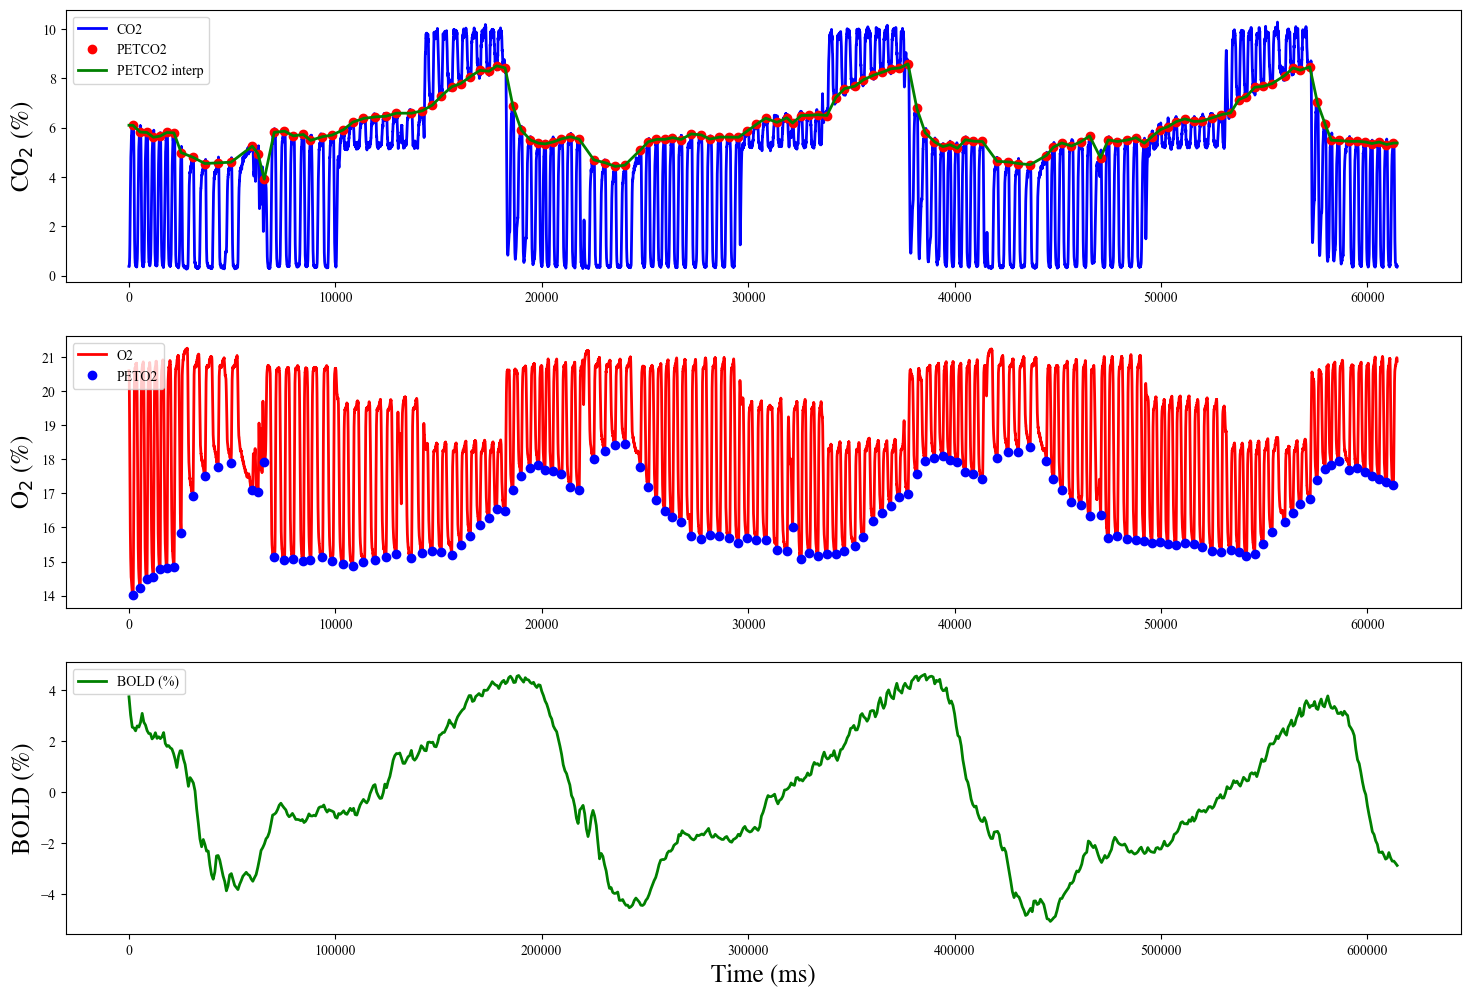

In [175]:
# plot the CO2 and O2 data with the CO2 peaks and the O2 valleys overlaid respectively 
fig_peaks = plt.figure()

#plot parameters
fig_peaks.set_figheight(12)
fig_peaks.set_figwidth(18)
tfont = {'fontname':'Times'}

#plot CO2 percentage
ax1 = fig_peaks.add_subplot(311)
ax1.set_ylabel('CO$_{2}$ (%)', fontsize=18, **tfont)
CO2.plot(c="blue", lw=2, label='CO2')
CO2peaks_df.plot(c="red", lw=2, ax=ax1, marker='o', linestyle='None', label='PETCO2')
CO2peaks_interp.plot(c="green", lw=2, ax=ax1, label='PETCO2 interp')
# add legend to ax1
plt.legend(['CO2', 'PETCO2', 'PETCO2 interp'], loc='upper left')

#plot O2 percentage
ax2 = fig_peaks.add_subplot(312)
ax2.set_ylabel('O$_{2}$ (%)', fontsize=18, **tfont)
O2.plot(c="red", lw=2, label='O2')
O2valleys_df.plot(c="blue", lw=2, ax=ax2, marker='o', linestyle='None', label='PETO2')
plt.legend(['O2', 'PETO2'], loc='upper left')

#plot func_data_thresh_avg
ax3 = fig_peaks.add_subplot(313)
ax3.set_ylabel('BOLD (%)', fontsize=18, **tfont)
func_data_thresh_avg.plot(c="green", lw=2, ax=ax3, label='filtered func signal')
plt.legend(['BOLD (%)'], loc='upper left')
ax3.set_xlabel('Time (ms)', fontsize=18, **tfont)



(61441, 1)


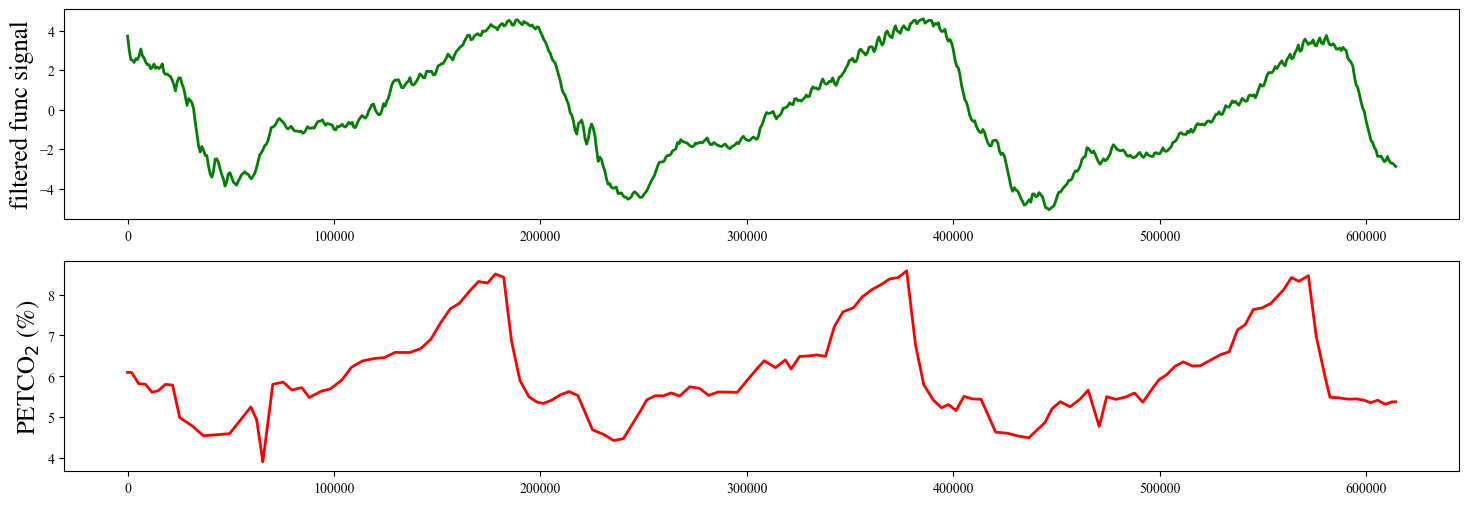

In [176]:
#CO2peaks_resample = resample(CO2peaks_interp, len(func_data_thresh_avg))
CO2peaks_resample = CO2peaks_interp.copy()
#multiply the index of CO2peaks resample by 10 
CO2peaks_resample.index = CO2peaks_resample.index*10
# convert to pandas dataframe
CO2peaks_resample = pd.DataFrame(CO2peaks_resample)
print(CO2peaks_resample.shape)

# plot the resampled CO2 peaks and the func_data_thresh_avg
fig = plt.figure()

#plot parameters
fig.set_figheight(6)
fig.set_figwidth(18)
tfont = {'fontname':'Times'}

#plot func_data_thresh_avg
ax1 = fig.add_subplot(211)
ax1.set_ylabel('filtered func signal', fontsize=18, **tfont)
func_data_thresh_avg.plot(c="green", lw=2, ax=ax1)
ax1.get_legend().remove()

#plot CO2 percentage
ax2 = fig.add_subplot(212)
ax2.set_ylabel('PETCO$_{2}$ (%)', fontsize=18, **tfont)
CO2peaks_resample.plot(c="red", lw=2, ax=ax2)
# remove the legend
ax2.get_legend().remove()


769
769
(769, 1)
(769, 1)


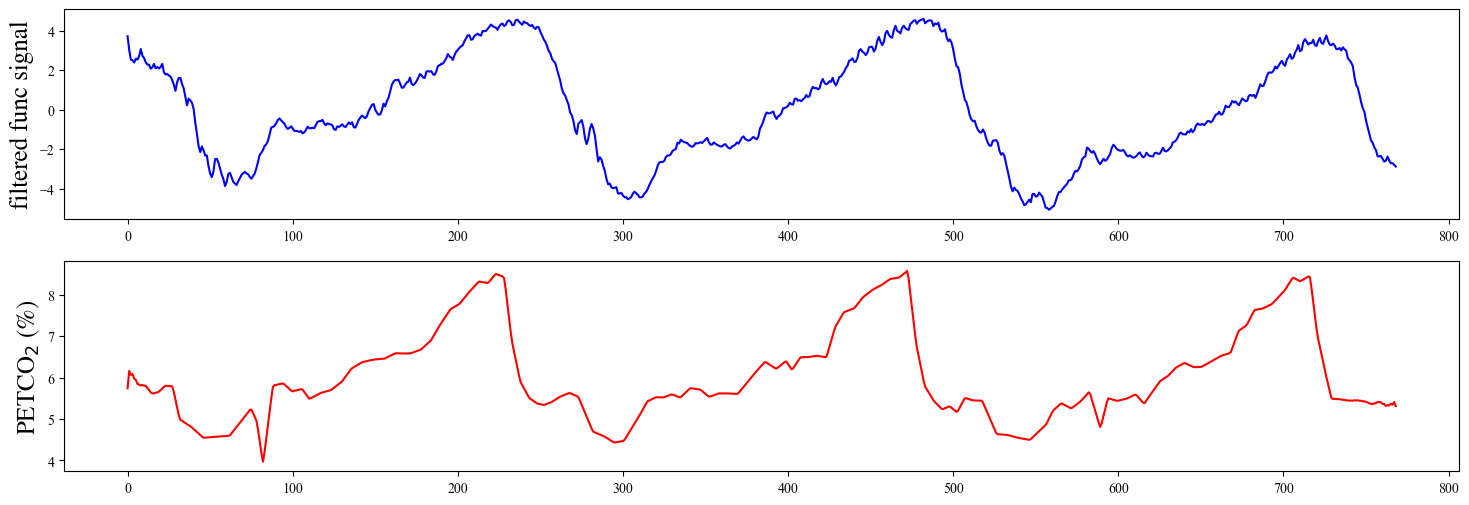

In [177]:
# Reshape the func_data_thresh_avg and CO2peaks_resample arrays and ensure there's no missing data
A= func_data_thresh_avg.to_numpy()
B= CO2peaks_resample.to_numpy()

# upsample B to be the same length as A
B = resample(B, len(A))


print(len(A))
print(len(B))
a=np.ma.masked_invalid(A)
b=np.ma.masked_invalid(B)
#msk = (~a.mask & ~b.mask)
func = a
co2 = b
print(func.shape)
print(co2.shape)

# plot the resampled CO2 peaks and the func_data_thresh_avg
fig_prealign = plt.figure()
#plot parameters
fig_prealign.set_figheight(6)
fig_prealign.set_figwidth(18)
tfont = {'fontname':'Times'}
# plot the func on the top plot and the co2 on the bottom plot
ax1 = plt.subplot(211)
ax1.plot(func, color='blue')
ax1.set_ylabel('filtered func signal', fontsize=18, **tfont)

ax2 = plt.subplot(212)
ax2.plot(co2, color='red')
ax2.set_ylabel('PETCO$_{2}$ (%)', fontsize=18, **tfont)
# use same x axis for both plots
#plt.xlim(0, len(co2))
plt.show()

Number of NaN values in CO2: 0
Number of NaN values in func: 0
shape of func_fft: (769,)
shape of co2_fft: (769,)
length of func_fft_peaks: 254
mean of func_fft_peaks: 382.98818897637796
length of co2_fft_peaks: 244
mean of co2_fft_peaks: 384.5
length of func_fft after cropping: 769


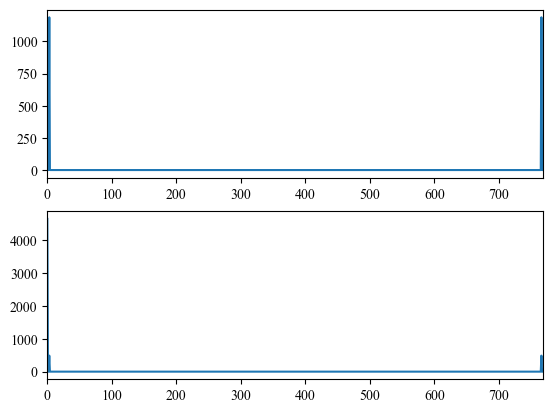

/Users/ghayes/miniconda3/envs/sigcvr/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ghayes/miniconda3/envs/sigcvr/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


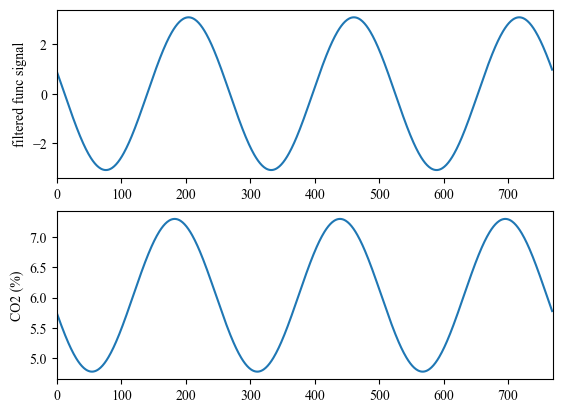

In [178]:
# # Smooth func and co2 data (only take the primary frequency) before aligning the signals with cross-correlation

# remove nan values from co2 data
print('Number of NaN values in CO2:', np.isnan(co2).sum())
co2 = co2[~np.isnan(co2)]

# remove nan values from ffunc data
print('Number of NaN values in func:', np.isnan(func).sum())
func = func[~np.isnan(func)]

# do a fourier transfrom of func and co2 data and only keep frequencies that are the most prominant
func_fft = fft(func)
co2_fft = fft(co2)

print('shape of func_fft:', func_fft.shape)
print('shape of co2_fft:', co2_fft.shape)


# Keep only the largest frequency peak
# find the peaks in the fft of the func and co2 data
func_fft_peaks, _ = find_peaks(np.abs(func_fft))
co2_fft_peaks, _ = find_peaks(np.abs(co2_fft))
print('length of func_fft_peaks:', len(func_fft_peaks))
print('mean of func_fft_peaks:', np.mean(func_fft_peaks))
print('length of co2_fft_peaks:', len(co2_fft_peaks))
print('mean of co2_fft_peaks:', np.mean(co2_fft_peaks))
# set all frequencies to zero except the largest frequency peak
func_fft[np.abs(func_fft) < np.max(np.abs(func_fft[func_fft_peaks]))] = 0
co2_fft[np.abs(co2_fft) < np.max(np.abs(co2_fft[co2_fft_peaks]))] = 0

print('length of func_fft after cropping:', len(func_fft))

# inverse fourier transform
func_smooth = ifft(func_fft)
co2_smooth = ifft(co2_fft)
# plot the fft of the func and co2 data
plt.figure()
plt.subplot(211)
plt.plot(np.abs(func_fft))
plt.xlim(0, len(co2))
plt.subplot(212)
plt.plot(np.abs(co2_fft))
# align the x axis of the two plots
plt.xlim(0, len(co2))

plt.show()

# plot the func on the top plot and the co2 on the bottom plot
plt.figure()
plt.subplot(211)
plt.plot(func_smooth)
plt.ylabel('filtered func signal')
plt.xlim(0, len(co2))
plt.subplot(212)
plt.plot(co2_smooth)
plt.ylabel('CO2 (%)')
plt.xlim(0, len(co2))
plt.show()

# print(func_smooth)
# print(co2_smooth)

length of func_smooth: 769
length of co2_smooth_padded: 969


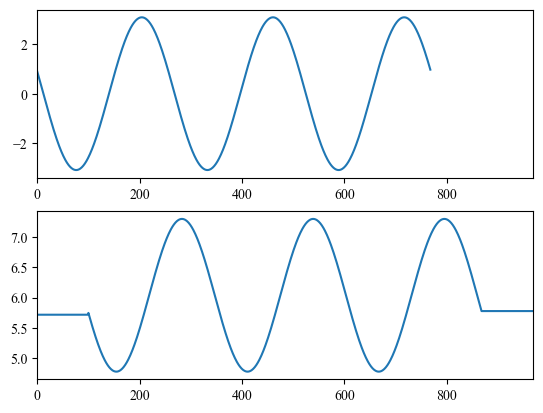

In [179]:
# pad the beginning of co2 with zeros 'front_crop' times and the back with zeros 'back_crop' times
co2_smooth_padded = np.pad(co2_smooth, (100, 100), 'constant', constant_values=(co2_smooth[1], co2_smooth[-1]))

print('length of func_smooth:', len(func_smooth))
print('length of co2_smooth_padded:', len(co2_smooth_padded))

# plot the func on the top plot and the co2 on the bottom plot
plt.figure()
plt.subplot(211)
plt.plot(func_smooth)
plt.xlim(0, len(co2_smooth_padded))
plt.subplot(212)
plt.plot(co2_smooth_padded)
plt.xlim(0, len(co2_smooth_padded))
plt.show()

In [180]:
# func = func_smooth.copy()
# co2 = co2_smooth_padded.copy()
# # align the 3 largest peaks in the func_smooth and co2_smooth_padded data
# # find the peaks in the func and co2 data
# func_smooth_peaks, _ = find_peaks(func_smooth, height=0)
# co2_smooth_peaks, _ = find_peaks(co2_smooth_padded, height=0)
# # find the 3 largest peaks in the func and co2 data
# func_smooth_largest_peaks = np.sort(func_smooth[func_smooth_peaks])[-3:]
# co2_smooth_largest_peaks = np.sort(co2_smooth_padded[co2_smooth_peaks])[-3:]
# # find the indices of the 3 largest peaks in the func and co2 data
# func_smooth_largest_peaks_inds = np.argsort(func_smooth[func_smooth_peaks])[-3:]
# co2_smooth_largest_peaks_inds = np.argsort(co2_smooth_padded[co2_smooth_peaks])[-3:]
# # print the 3 largest peaks in the func and co2 data
# print('func_smooth_largest_peaks:', func_smooth_largest_peaks)
# print('co2_smooth_largest_peaks:', co2_smooth_largest_peaks)
# # print the indices of the 3 largest peaks in the func and co2 data
# print('func_smooth_largest_peaks_inds:', func_smooth_largest_peaks_inds)
# print('co2_smooth_largest_peaks_inds:', co2_smooth_largest_peaks_inds)

maxcorr index: 738
corr: [ 5.58203794-1.57681681e-15j 11.54590929-1.94777650e-15j
 17.88604878+4.20787469e-15j ... 14.40247508+1.04757384e-14j
  9.99731498+7.92372982e-15j  5.19483846+6.09532908e-15j]


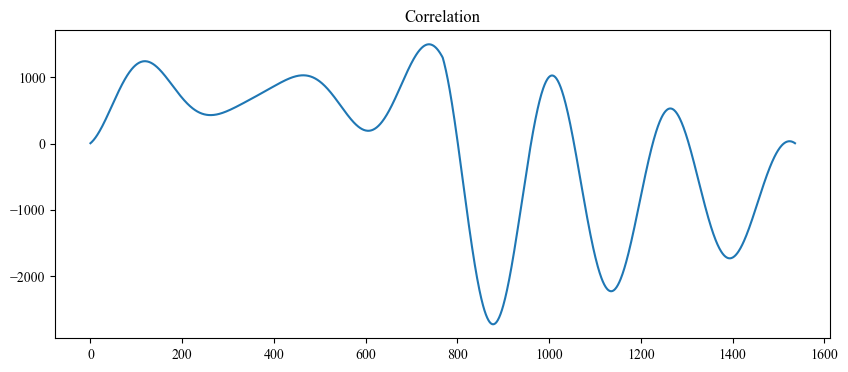

In [181]:
#--------------------
# CROSS CORRELATION
#--------------------
# Compute the cross correlation between the func and co2 data and find the time shift between the two signals
# find the time shift between func and co2
C = np.correlate(co2_smooth, func_smooth, "full")

# find the index of the maximum value in the correlation below index 200
max_corr_ind = 600+ np.argmax(C[600:800])
print('maxcorr index:', max_corr_ind)

# plot correlation
fig_correlation = plt.figure()
fig_correlation.set_figheight(4)
fig_correlation.set_figwidth(10)
plt.plot(C)
plt.title('Correlation')
print('corr:', C)

time_shift: 31 indices


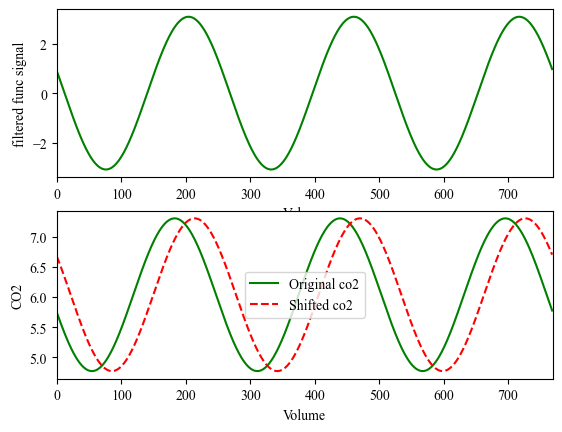

In [182]:
# Use the cross correlation to find the time shift between the two signals
# find the time shift between the two signals
time_shift = len(co2_smooth) - max_corr_ind #+200
print('time_shift:', time_shift, 'indices')

co2peak_smooth_shift = np.roll(co2_smooth, time_shift)

# shift the func data by the time shift
func_SHIFT = np.roll(func_smooth, time_shift)

# plot the func on the top plot and the co2 on the bottom plot
plt.figure()

plt.subplot(211)
plt.plot(func_smooth, label='Original MCAvmean', color='green', linestyle='-')
#plt.plot(func_SHIFT, label='Shifted MCAvmean', color='red', linestyle='--')
plt.xlabel('Volume')
plt.ylabel('filtered func signal')
plt.xlim(0, len(co2_smooth))

plt.subplot(212)
plt.plot(co2_smooth, label='Original co2', color='green', linestyle='-')
plt.plot(co2peak_smooth_shift, label='Shifted co2', color='red', linestyle='--')
plt.xlim(0, len(co2_smooth))
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.legend()
plt.show()

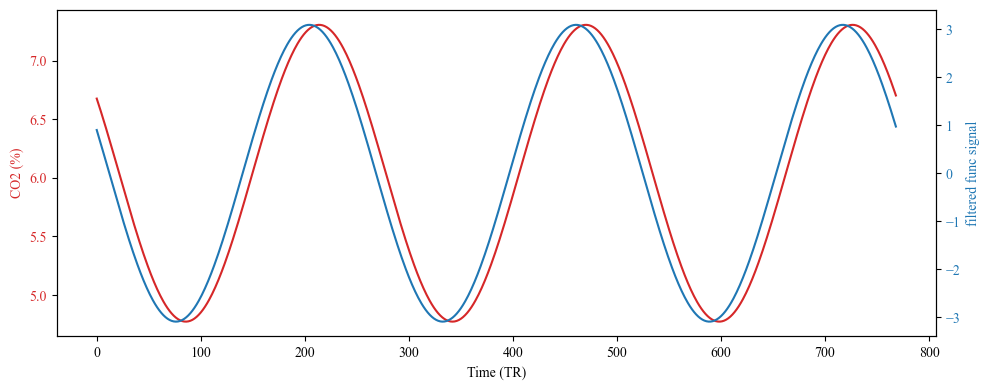

In [183]:
# plot the func and co2 data on the same plot with different axes
fig_overlay_alignment, ax1 = plt.subplots()
fig_overlay_alignment.set_figheight(4)
fig_overlay_alignment.set_figwidth(10)
tfont = {'fontname':'Times'}
color = 'tab:red'
ax1.set_xlabel('Time (TR)')
ax1.set_ylabel('CO2 (%)', color=color)
ax1.plot(co2peak_smooth_shift, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('filtered func signal', color=color)
ax2.plot(func_smooth, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig_overlay_alignment.tight_layout()
plt.show()

In [184]:
# #interations to check 
# iterations = 7000 #12000 #18000
# offset = 10000 #12000 # 15000

# corr_max, corr_max_ind, corr = cvr_func.x_corr(func, co2, iterations, offset, False)

# print('Max xcorr', corr_max)
# print('Max xcorr ind', corr_max_ind)

# xcorr_shift = corr_max_ind - 20000 #corr_max_ind - front_crop

# print('xcorr_shift', xcorr_shift)
# print('time shift', xcorr_shift/sample_rate, 's')

In [185]:
# xcorr_shift = time_shift
# corr = C

In [186]:
# # save a log file for the cross correlation
# log_file = local + 'sample_data/xcorr_log.csv' 
# # check if the file exists and if not create it

# if not os.path.isfile(log_file):
#     with open(log_file, 'w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(["filename", "xcorr_shift", "time_shift"])
#         writer.writerow([filename, xcorr_shift, xcorr_shift/sample_rate])
#     # otherwise append to the file
# else:
#     with open(log_file, 'a', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow([filename, xcorr_shift, xcorr_shift/sample_rate])



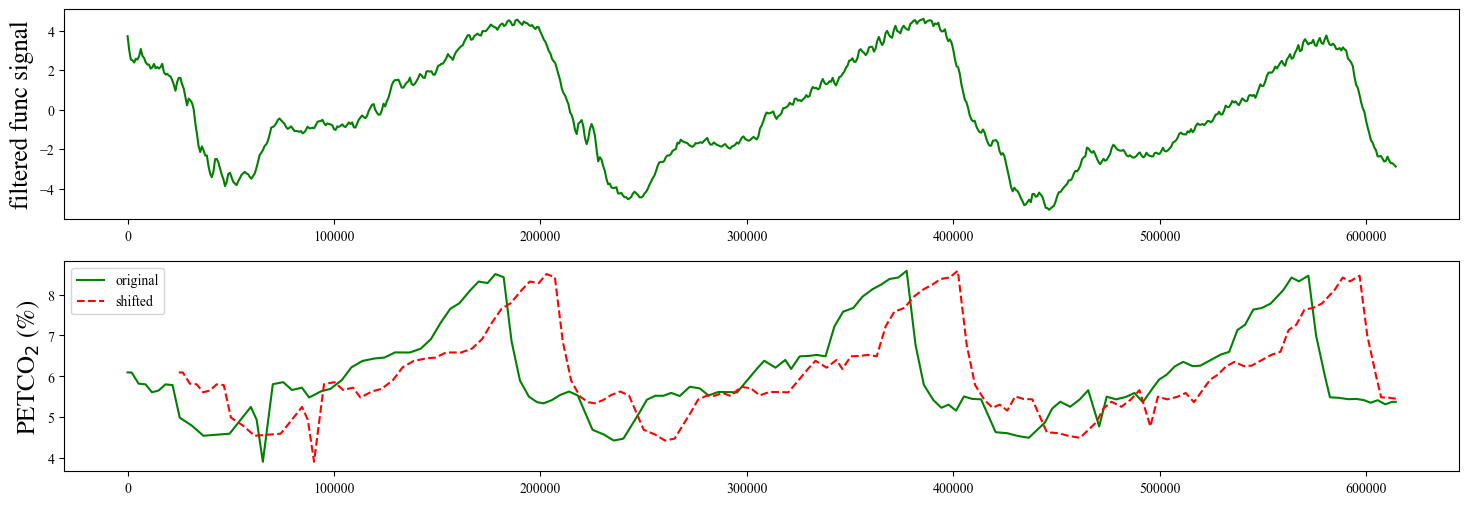

In [187]:

# shift co2 by the time shift adjusted for the TR (800 ms) and the sample rate (x10)
co2peaks_resample_shifted = CO2peaks_resample.shift(periods=int(time_shift*TR/10), fill_value=np.nan)

# plot func and CO2 with time shift
fig_xcorr_applied = plt.figure()
#plot parameters
fig_xcorr_applied.set_figheight(6)
fig_xcorr_applied.set_figwidth(18)
tfont = {'fontname':'Times'}
ax1 = plt.subplot(211)
ax1.plot(func_data_thresh_avg, label='original', color='green', linestyle='-')
ax1.set_ylabel('filtered func signal', fontsize=18, **tfont)

ax2 = plt.subplot(212)
ax2.plot(CO2peaks_resample,label='original', color='green', linestyle='-')
ax2.plot(co2peaks_resample_shifted, label='shifted', color='red', linestyle='--')
ax2.set_ylabel('PETCO$_{2}$ (%)', fontsize=18, **tfont)
plt.legend()
# use same x axis for both plots
#plt.xlim(0, len(TCD_rolling_shifted))



In [188]:
# if save_files is True, save the figure
if save_files:
    fig_xcorr_applied.savefig(output_dir_fig + sub +'_xcorr_applied.png')

In [189]:
# #plot
# fig = plt.figure()

# #plot parameters
# fig.set_figheight(12)
# fig.set_figwidth(18)
# tfont = {'fontname':'Times'}

# #plot TCD MCAv
# ax1 = fig.add_subplot(311)
# ax1.set_title("Ramp Protocol", fontsize=18, **tfont)       
# ax1.set_ylabel('Average GM BOLD timecourse', fontsize=18, **tfont)
# func_data_thresh_avg.plot(ax=ax1,c="black", lw=2)

# #plot CO2 percentage
# ax2 = fig.add_subplot(312)   
# ax2.set_ylabel('CO$_{2}$ (mmHg)', fontsize=18, **tfont)
# CO2.plot(ax=ax2,c="blue", lw=2)
# # plot the CO2 peaks
# CO2peaks_df.plot(ax=ax2, marker='*',linestyle='None',markersize = 20.0, color = 'g')
# ax2.legend(['End-Tidal CO2'], fontsize=10)
# # overlay interpolated CO2 on CO2 plot
# ax2.plot(CO2peaks_interp, c="red", lw=3)


# #plot O2 percentage
# ax3 = fig.add_subplot(313)     
# ax3.set_ylabel('O$_{2}$ (%)', fontsize=18, **tfont)
# O2.plot(ax=ax3,c="red", lw=2)
# O2valleys_df.plot(ax=ax3, marker='*',linestyle='None',markersize = 20.0, color = 'g')
# ax3.legend(['End-Tidal O2'], fontsize=10)


# # remove legend from all plots
# ax1.legend('')
# ax2.legend('')
# ax3.legend('')

# plt.show()

Text(0.5, 1.0, 'xcorr only applied to petco2')

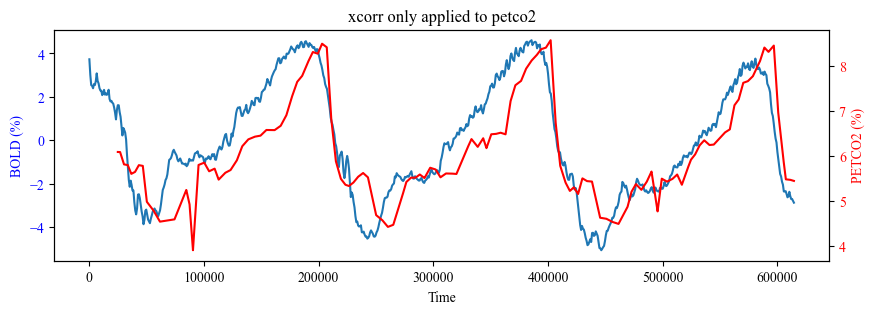

In [190]:
# Define figure 
fig_xcorronly = plt.figure(figsize=(10,3))
plt.plot(func_data_thresh_avg)
plt.xlabel('Time')
plt.ylabel('BOLD (%)', color='b')
# color the y-axis blue
plt.tick_params(axis='y',labelcolor='b')
# Add another axis to plot petco2
ax2 = plt.twinx()
ax2.plot(co2peaks_resample_shifted,'r')
ax2.set_ylabel('PETCO2 (%)',color='r')
ax2.tick_params(axis='y',labelcolor='r')
# add a title
plt.title('xcorr only applied to petco2')

In [191]:
# if save_files is True, save the figure
if save_files:
    fig_xcorronly.savefig(output_dir_fig + sub +'_MCAvsPETCO2peaks_xcorronly.png')

Total time shift applied: 8.8 s =  24.8 s (xcorr) + -16.0 s (manual)


Text(0.5, 1.0, 'Total time shift applied of 8.8 (24.8s xcorr, -16.0s manual)')

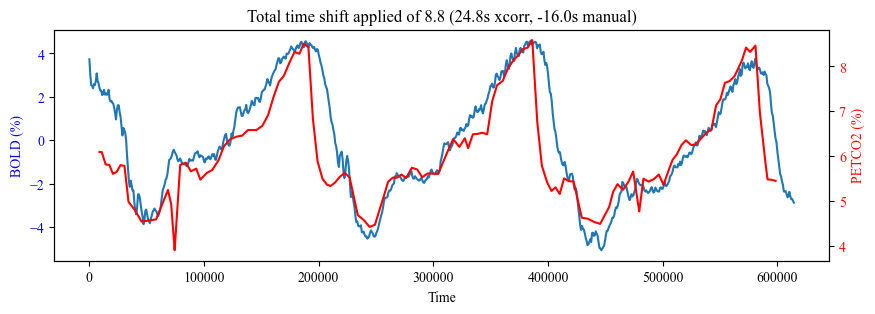

In [192]:
# manually shift the co2peaks_resample_shifted data to align with the func data
co2peaks_resample_manual = co2peaks_resample_shifted.shift(periods=int(man_shift*TR/10), fill_value=np.nan)

# Define figure 
fig_xcorrandman = plt.figure(figsize=(10,3))
plt.plot(func_data_thresh_avg)
plt.xlabel('Time')
plt.ylabel('BOLD (%)', color='b')
# color the y-axis blue
plt.tick_params(axis='y',labelcolor='b')
# Add another axis to plot petco2
ax2 = plt.twinx()
ax2.plot(co2peaks_resample_manual,'r')
ax2.set_ylabel('PETCO2 (%)',color='r')
ax2.tick_params(axis='y',labelcolor='r')

# add a title with the total time shift applied
total_time_shift_applied_sec = int(time_shift+man_shift)*TR/1000
print('Total time shift applied:', total_time_shift_applied_sec, 's = ', int(time_shift*TR)/1000, 's (xcorr) +', int(man_shift*TR)/1000, 's (manual)')
text = 'Total time shift applied of ' + str(total_time_shift_applied_sec) + ' (' + str(int(time_shift*TR)/1000) + 's xcorr, ' + str(int(man_shift*TR)/1000) + 's manual)'
plt.title(text)

In [193]:
# if save_files is True, save the figure
if save_files:
    fig_xcorrandman.savefig(output_dir_fig + sub +'_MCAvsPETCO2peaks_xcorr_and_manual_shifted.png')

In [194]:
# save total_time_shift_applied_sec into a csv

print('Subject MR-:', sub)

csv_time_shift_parameters = outdir_logs + 'time_shift_log_mri.csv'
time_shift_parameters = pd.DataFrame({'sub-mr':[sub],'total_time_shift_applied_sec':[total_time_shift_applied_sec], 'xcorr_shift_sec':[int(time_shift*TR)/1000]})
# if the file does not exist, create it
if not os.path.exists(csv_time_shift_parameters):
    time_shift_parameters.to_csv(csv_time_shift_parameters, index=False)
    print('Time shift log saved to new file:', csv_time_shift_parameters)
# if the file exists, append to it
else:
    time_shift_parameters.to_csv(csv_time_shift_parameters, mode='a', header=False, index=False)
    print('Time shift parameter log appended to existing file:', csv_time_shift_parameters)


Subject MR-: mr-003
Time shift parameter log appended to existing file: /Users/ghayes/Desktop/ramp_protocol/proc/time_shift_log_mri.csv


Sample rate: 100.00000000009095 Hz
Xcorr shift (in TRs): 31
Manual shift (in TRs): -20
Total shift (in TRs): 11
Total shift (in labchart indices): 880
shape of df_raw (before cropping or shifting): (114669, 4)
shape of df_all_shifted (after shifting): (115549, 4)
--- DATA BEFORE SHIFTING ---
First 5 values of CO2: 0    5.565638
1    5.583873
2    5.604861
3    5.620344
4    5.633074
Name: CO2, dtype: float64
Last 5 values of CO2: 114664    0.330732
114665    0.335549
114666    0.336238
114667    0.333829
114668    0.329356
Name: CO2, dtype: float64
---- DATA AFTER SHIFTING ----
First 5 values of CO2: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CO2, dtype: float64
Last 5 values of CO2: 115544    0.330732
115545    0.335549
115546    0.336238
115547    0.333829
115548    0.329356
Name: CO2, dtype: float64
number of triggers found: 769
extracting the last 769 triggers
index of the first trigger: 35119
index of the last trigger: 96558
index to start crop: 34239
index to end crop: 95

/var/folders/ck/546jljvj7g3cptvhpxg8p2qh0000gn/T/ipykernel_91657/736106239.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_rate = 1/(float(df_all.iloc[2][0]) - float(df_all.iloc[1][0]))


<Axes: ylabel='filtered func signal'>

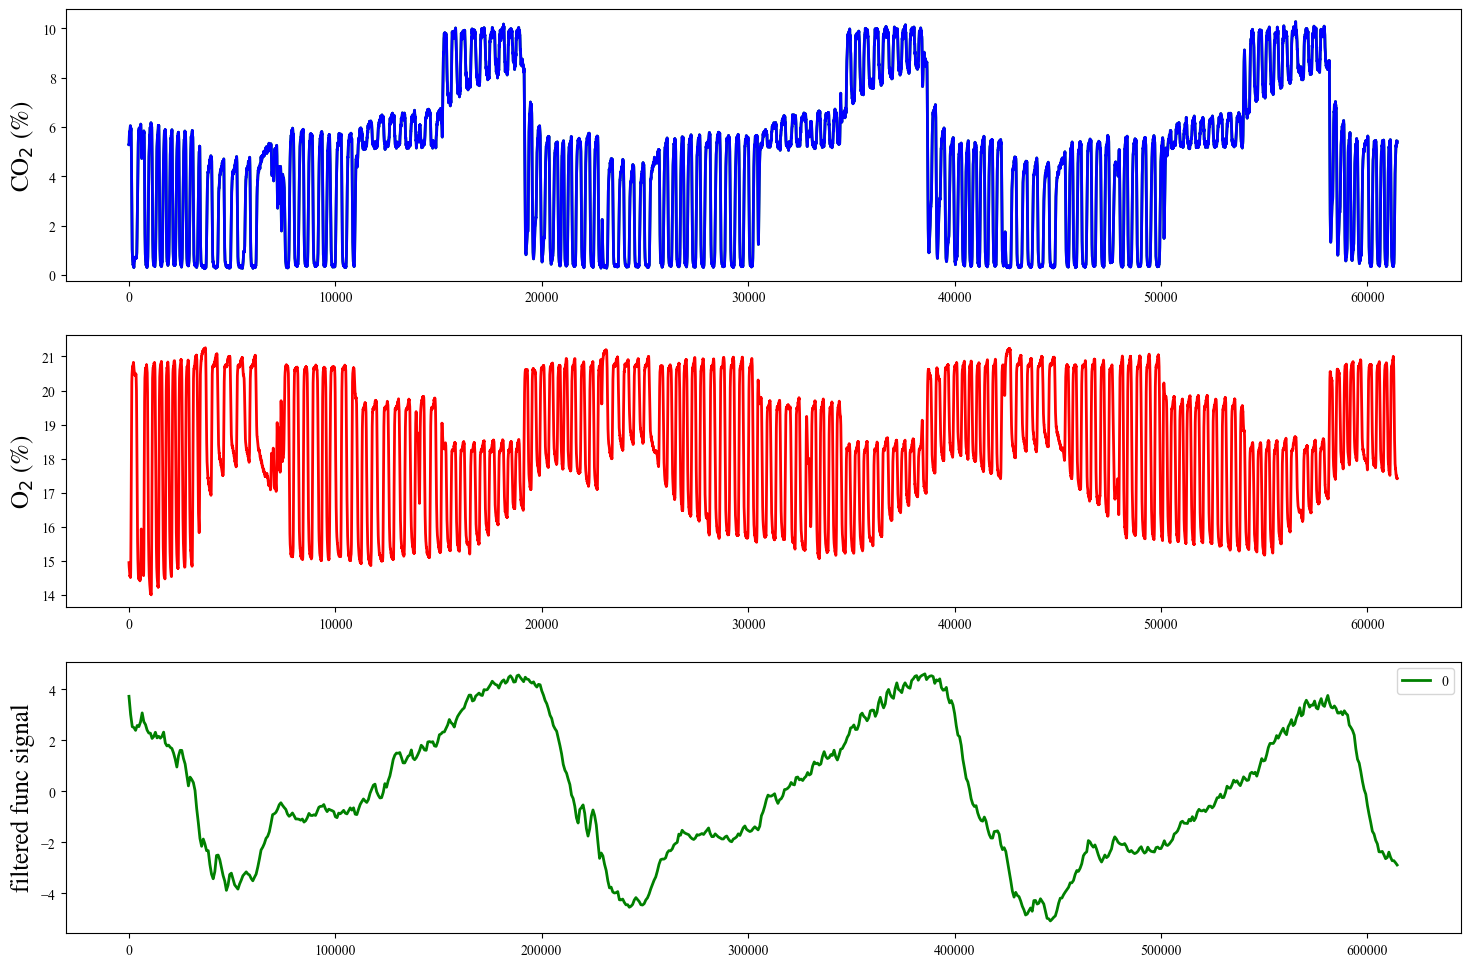

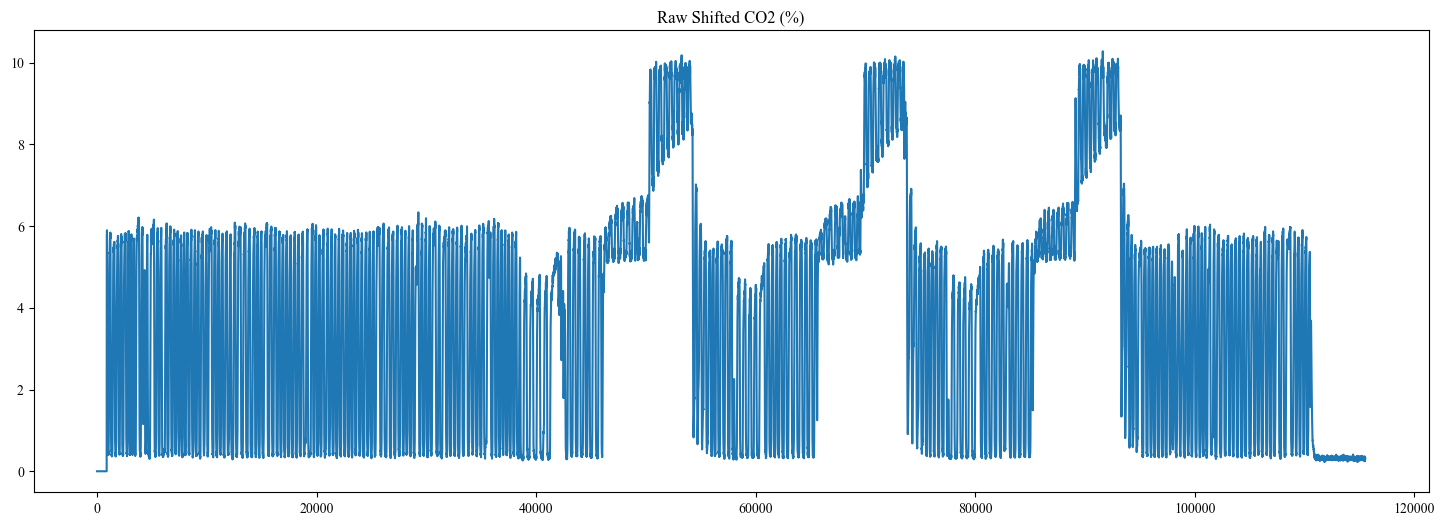

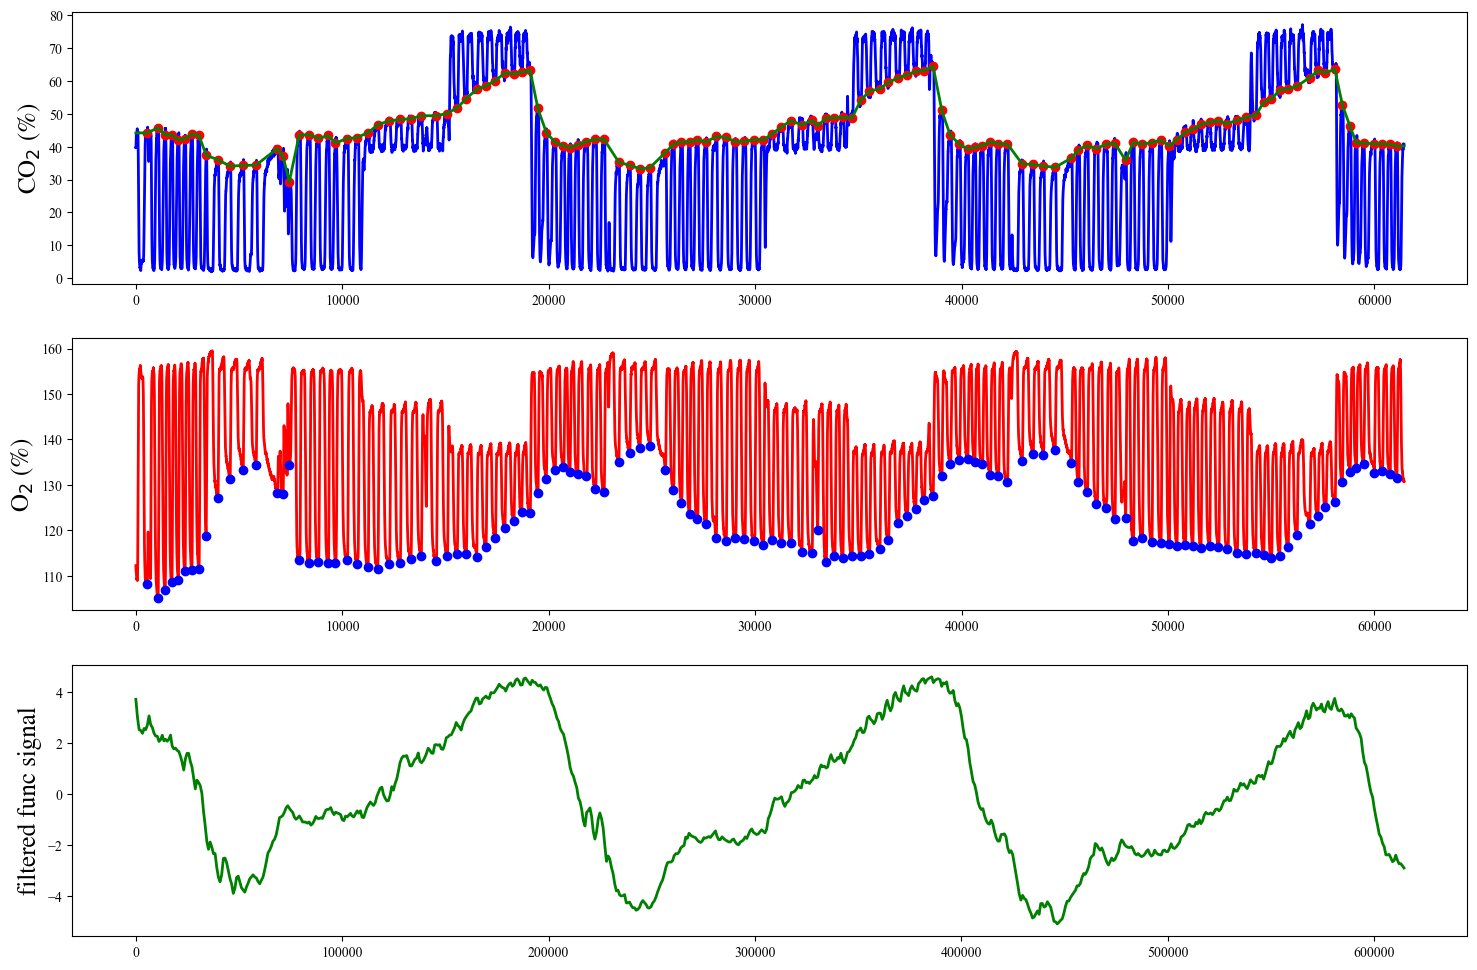

In [195]:
TR_s = 0.8 # TR in seconds
sample_rate = 1/(float(df_all.iloc[2][0]) - float(df_all.iloc[1][0]))
print('Sample rate:', sample_rate, 'Hz')

total_time_shift = time_shift + man_shift #total time shift in TRs (0.8s)
#total_time_shift = 200
print('Xcorr shift (in TRs):', time_shift)
print('Manual shift (in TRs):', man_shift)
print('Total shift (in TRs):', total_time_shift)
# convert total time shift to seconds then to index based on TR=0.8ms and sample rate
total_time_shift_inds = int(total_time_shift*TR_s*sample_rate)
print('Total shift (in labchart indices):', total_time_shift_inds)

# pad the beginning of df_raw with 'total_time_shift_inds' number of zeroes
df_all_shifted = pd.concat([pd.DataFrame(np.zeros((total_time_shift_inds, df_raw.shape[1])), columns=df_raw.columns), df_raw], ignore_index=True)

#re index the data
#df_all_shifted = df_all_shifted.reset_index(drop=True)
print('shape of df_raw (before cropping or shifting):', df_raw.shape)
print('shape of df_all_shifted (after shifting):', df_all_shifted.shape)

# print the first and last 5 values of the data before shifting
print('--- DATA BEFORE SHIFTING ---')
print('First 5 values of CO2:', df_raw['CO2'].head(5))
print('Last 5 values of CO2:', df_raw['CO2'].tail(5))
print('---- DATA AFTER SHIFTING ----')
print('First 5 values of CO2:', df_all_shifted['CO2'].head(5))
print('Last 5 values of CO2:', df_all_shifted['CO2'].tail(5))

# crop the data at the first trigger - (xcorrshift+manshift) to the last trigger - (xcorrshift+manshift)
df_all_shifted_cropped = cvr_func.get_data_between_triggers(df_raw, trig_col_name='Trig', trigger_thresh=3, num_ind_before_trig=total_time_shift_inds, num_ind_afer_trig=-total_time_shift_inds)


print('shape of df_all_shifted_cropped (after cropping):', df_all_shifted_cropped.shape)

# re index the data
df_all_shifted_cropped = df_all_shifted_cropped.reset_index(drop=True)

### SEPERATE DATA ###
#get raw CO2 and O2 data
CO2_sc = pd.to_numeric(df_all_shifted_cropped.iloc[:,1], errors='coerce')
O2_sc = pd.to_numeric(df_all_shifted_cropped.iloc[:,2], errors='coerce')
#get raw Trigger data
Trig_sc = pd.to_numeric(df_all_shifted_cropped.iloc[:,3], errors='coerce')

# plot the CO2 and O2 data with the CO2 peaks and the O2 valleys overlaid respectively 
fig1 = plt.figure()
#plot parameters
fig1.set_figheight(12)
fig1.set_figwidth(18)
tfont = {'fontname':'Times'}
#plot CO2 percentage
ax1 = fig1.add_subplot(311)
ax1.set_ylabel('CO$_{2}$ (%)', fontsize=18, **tfont)
CO2_sc.plot(c="green", lw=2)
CO2_sc.plot(c="blue", lw=2)
#plot O2 percentage
ax2 = fig1.add_subplot(312)
ax2.set_ylabel('O$_{2}$ (%)', fontsize=18, **tfont)
O2_sc.plot(c="red", lw=2)
#plot func_data_thresh_avg
ax3 = fig1.add_subplot(313)
ax3.set_ylabel('filtered func signal', fontsize=18, **tfont)
func_data_thresh_avg.plot(c="green", lw=2, ax=ax3)


#plot the CO2 column of df_all_shifted_cropped
fig2 = plt.figure()
#plot parameters
fig2.set_figheight(6)
fig2.set_figwidth(18)
plt.plot(df_all_shifted['CO2'])
plt.title('Raw Shifted CO2 (%)')

#### MASK CO2 DATA #### 
# Remove CO2 values above 100% CO2 (stopping and starting of the DAQ can cause erroneous values which are very large, this removes them)
CO2_sc = CO2_sc.mask(CO2_sc > 100)
# calculate the index of the CO2 values above 100cm/s
CO2_sc_above_100 = CO2_sc[CO2_sc > 100]
# remove this index from the O2 and TCD data as well
O2_sc = O2_sc.drop(CO2_sc_above_100.index)
# print CO2 values
print('--- CO2 VALUES ---')
print('First 10 values of CO2:', CO2_sc.head(10))
print(CO2_sc.shape)
# print the number of NaN values in the data
print('Number of NaN values in CO2_sc:', CO2_sc.isnull().sum())

# Define search window as 0.5 seconds longer than the average breathing rate
br_avg, _, _, _ = cvr_func.get_average_breathing_rate(O2_sc, sample_rate)
print('Average breathing rate:', 1/br_avg, 'seconds per breath')
# Define search window as 60% of the average breathing rate
search_window = (1/br_avg)*0.3
print('Sample rate:', sample_rate, 'Hz')
print('Search window:', search_window, 'seconds')

#### END TIDAL CO2 PEAKS FROM O2 VALLEYS ####
# Get the O2 end tidal val
# print the starting index of the O2 data
print('--- O2 INDEX ---')
print(O2_sc.index[0])

O2valleys_inds_sc, O2valleys_vals_sc, O2valleys_df_sc = cvr_func.get_endtidal_valleys(np.array(O2_sc), O2_sc.index[0], search_window=search_window, sample_rate=200, height=O2_height, prominence=O2prominence)

# Define the end tidal CO2 peaks as the CO2 peaks that occur at each of the O2 valley points
CO2peaks_inds_sc = O2valleys_inds_sc
CO2peaks_vals_sc = CO2_sc[CO2peaks_inds_sc]
# Make a dataframe of the CO2 peaks
CO2peaks_df_sc = pd.DataFrame(CO2peaks_vals_sc, index=CO2peaks_inds_sc)
CO2peaks_df_sc.columns = ['PETCO2']
print('--- CO2 PEAKS ---')
print('First 10 values of CO2peaks:', CO2peaks_df_sc.head(10))

O2valleys_df_sc = pd.DataFrame(O2valleys_vals_sc, index=O2valleys_inds_sc)
O2valleys_df_sc.columns = ['PETO2']


print('Size of petco2 data before interpolation',CO2peaks_df_sc.shape)
# interpolate the CO2 peaks to the same length as co2
CO2peaks_interp_sc = np.interp(np.arange(0, len(CO2_sc), 1), CO2peaks_inds_sc, CO2peaks_vals_sc)
CO2peaks_interp_sc = pd.DataFrame(CO2peaks_interp_sc)
print('Size of petco2 data after interpolation', CO2peaks_interp_sc.shape)

#### SCALE CO2 DATA AND O2 DATA FROM PERCENT TO MMHG ####
mmHg_per_hPa = 0.75006157584566 # mmHg/hPa
P_conversion_perc2mmHg = P_oxford*mmHg_per_hPa/100 # conversion factor from % gas concentration to mmHg
print('Conversion factor from % to mmHg:', P_conversion_perc2mmHg)
# Scale the CO2 data from % to mmHg
CO2_sc = CO2_sc*P_conversion_perc2mmHg
CO2peaks_df_sc = CO2peaks_df_sc*P_conversion_perc2mmHg
CO2peaks_interp_sc = CO2peaks_interp_sc*P_conversion_perc2mmHg
# Scale the O2 data from % to mmHg
O2_sc = O2_sc*P_conversion_perc2mmHg
O2valleys_df_sc = O2valleys_df_sc*P_conversion_perc2mmHg


# plot the CO2 and O2 data with the CO2 peaks and the O2 valleys overlaid respectively 
fig = plt.figure()
#plot parameters
fig.set_figheight(12)
fig.set_figwidth(18)
tfont = {'fontname':'Times'}
#plot CO2 percentage
ax1 = fig.add_subplot(311)
ax1.set_ylabel('CO$_{2}$ (%)', fontsize=18, **tfont)
CO2_sc.plot(c="blue", lw=2, legend=False)
CO2peaks_df_sc.plot(c="red", lw=2, ax=ax1, marker='o', linestyle='None', legend=False)
CO2peaks_interp_sc.plot(c="green", lw=2, ax=ax1, legend=False)
#plot O2 percentage
ax2 = fig.add_subplot(312)
ax2.set_ylabel('O$_{2}$ (%)', fontsize=18, **tfont)
O2_sc.plot(c="red", lw=2, legend=False)
O2valleys_df_sc.plot(c="blue", lw=2, ax=ax2, marker='o', linestyle='None', legend=False)
#plot func_data_thresh_avg
ax3 = fig.add_subplot(313)
ax3.set_ylabel('filtered func signal', fontsize=18, **tfont)
func_data_thresh_avg.plot(c="green", lw=2, ax=ax3, legend=False)
# # legends
# ax1.legend(['Interp. PETCO$_{2}$', 'PETCO$_{2}$'], loc='upper left')
# ax2.legend(['PET$_{O2}$'], loc='lower right')


In [ ]:
#plot
fig_overview = plt.figure()

#plot parameters
fig_overview.set_figheight(18)
fig_overview.set_figwidth(15)
tfont = {'fontname':'Times'}

#plot TCD MCAv
ax1 = fig_overview.add_subplot(411)
ax1.set_title("BOLD-fMRI and Corresponding CO$_{2}$ Trace", fontsize=18, **tfont)       
ax1.set_ylabel('BOLD (%)', fontsize=18, **tfont)
func_data_thresh_avg.plot(c="green", lw=2, ax=ax3, legend=False)
#remove x axis labels and ticks
ax1.set_xticklabels([])
ax1.set_xticks([])


#plot CO2 percentage
ax2 = fig_overview.add_subplot(412)   
ax2.set_ylabel('CO$_{2}$ (mmHg)', fontsize=18, **tfont)
CO2_sc.plot(c="blue", lw=2, legend=False)
CO2peaks_df_sc.plot(c="red", lw=2, ax=ax2, marker='o', linestyle='None', legend=False)
CO2peaks_interp_sc.plot(c="green", lw=2, ax=ax1, legend=False)
#ax2.legend(['End-Tidal CO2'], fontsize=10)
# overlay interpolated CO2 on CO2 plot
ax2.set_xlabel('Time (s)', fontsize=18, **tfont) 
#scale the x axis labels by 5 to convert to ms
ax2.set_xticklabels(np.arange(0, len(CO2peaks_interp), step=100))

plt.show()

(769, 1)


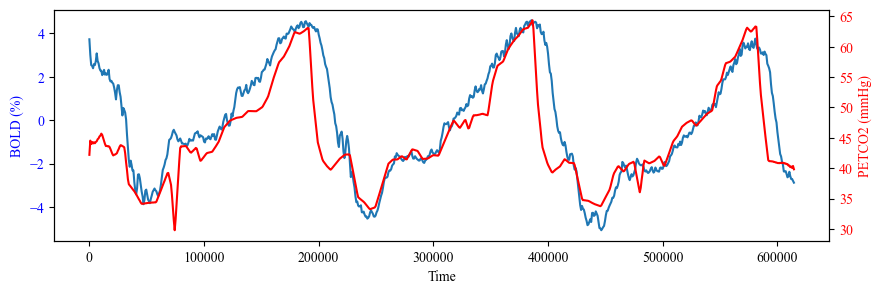

In [196]:
# Resample CO2peaks_interp_sc to the same length as func_data_thresh_avg
CO2peaks_interp_sc_resample = resample(CO2peaks_interp_sc, len(func_data_thresh_avg))
# convert to pandas dataframe
CO2peaks_interp_sc_resample = pd.DataFrame(CO2peaks_interp_sc_resample, index=func_data_thresh_avg.index)
print(CO2peaks_interp_sc_resample.shape)

# Define figure 
fig6 = plt.figure(figsize=(10,3))
#set fig to use times font
tfont = {'fontname':'Times'}
plt.plot(func_data_thresh_avg)
plt.xlabel('Time')
plt.ylabel('BOLD (%)', color='b')
# color the y-axis blue
plt.tick_params(axis='y',labelcolor='b')
# Add another axis to plot petco2
ax2 = plt.twinx()
ax2.plot(CO2peaks_interp_sc_resample,'r')
ax2.set_ylabel('PETCO2 (mmHg)',color='r')
ax2.tick_params(axis='y',labelcolor='r')

In [197]:
func_final = func_data_thresh_avg
petco2_final = CO2peaks_interp_sc_resample

In [198]:
# print size and datatype of TCD_rolling
print('Size of preprocessed final func signal:', len(func_final))
print('Datatype of preprocessed final func signal:', type(func_final))
# print size and datatype of CO2peaks_interp
print('Size of interpolated and aligned PETCO2:', len(petco2_final))
print('Datatype of interpolated and aligned PETCO2:', type(petco2_final))

Size of preprocessed final func signal: 769
Datatype of preprocessed final func signal: <class 'pandas.core.frame.DataFrame'>
Size of interpolated and aligned PETCO2: 769
Datatype of interpolated and aligned PETCO2: <class 'pandas.core.frame.DataFrame'>


In [199]:
# label the first header of func_final "time (ms)" and the second header "signal"
func_final_header = ['signal']

# label the first header of petco2 final "time (ms)" and the second header "PETCO2 (mmHg)"
petco2_final_header = ['PETCO2 (mmHg)']

# give func_final and petco2_final headers
func_final = pd.DataFrame(func_final)
func_final.columns = func_final_header
petco2_final = pd.DataFrame(petco2_final)
petco2_final.columns = petco2_final_header

In [200]:
# save func_final and petco2_final as csv files in the output folder

# generate the new filenames
func_final_filename = sub+'_func_final.csv'
petco2_final_filename = sub+'_petco2_final.csv'

# save the func_final and petco2_final dataframes as csv files
if save_files==True:
    func_final.to_csv(output_dir + '/' + func_final_filename, index=False)
    petco2_final.to_csv(output_dir + '/' + petco2_final_filename, index=False)


# Save a normalised PETCO2 text file for FSL processing

In [201]:
# normalize the petco2_final data by subtracting the minimun value and dividing by the range

petco2_final_norm = (petco2_final - petco2_final.min())/(petco2_final.max() - petco2_final.min())

In [202]:
# save a text file version of the petco2_final data with 1 column of with the volume number starting at 1 and the second column with the petco2_final data
petco2_final_text_filename = sub+'_petco2_norm_final.txt'
# generate the volume numbers
volume_numbers = np.arange(1, len(petco2_final)+1)
#integer_petco2_final = petco2_final_norm.astype(int)
#print(integer_petco2_final)
# create a dataframe of the volume numbers and the petco2_final data
petco2_final_text = pd.DataFrame({'PETCO2': petco2_final_norm['PETCO2 (mmHg)']})
# save the petco2_final_text as a text with NO headers
if save_files==True:
    petco2_final_text.to_csv(output_dir + '/' + petco2_final_text_filename, sep=' ', index=False, header=False)
    